In [1]:
################################################################################################################################
#
# ECONOMETRIC - ROLLING - LN - DAILY - ARMA FracDiff
#
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#-------------------------------
# 5  ARMA FracDiff     0      0
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# ENVIRONMENT: LIBRARIES
#===============================================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
################################################################################################################################
# DATA
################################################################################################################################

#===============================================================================================================================
# DATA: READ
#===============================================================================================================================
seriesId='IBOV-FracDiff-Ln'
df = pd.read_csv('Data/Input/'+seriesId+'.csv')
#df.drop(['Open','Low','High', 'Qt'], axis='columns', inplace=True )
PERIOD=249
df

Date     Close
0     2001-09-20  1.407736
1     2001-09-21  1.402014
2     2001-09-24  1.419516
3     2001-09-25  1.391312
4     2001-09-26  1.379019
...          ...       ...
5511  2023-12-21  1.945807
5512  2023-12-22  1.946708
5513  2023-12-26  1.949707
5514  2023-12-27  1.951411
5515  2023-12-28  1.948196

[5516 rows x 2 columns]

In [3]:
#===============================================================================================================================
# DATA: DATETIME
#===============================================================================================================================
df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)
df

C:\Users\55119\AppData\Local\Temp\ipykernel_12872\3116847714.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)


Date     Close
0    2001-09-20  1.407736
1    2001-09-21  1.402014
2    2001-09-24  1.419516
3    2001-09-25  1.391312
4    2001-09-26  1.379019
...         ...       ...
5511 2023-12-21  1.945807
5512 2023-12-22  1.946708
5513 2023-12-26  1.949707
5514 2023-12-27  1.951411
5515 2023-12-28  1.948196

[5516 rows x 2 columns]

In [4]:
#===============================================================================================================================
# DATA: SET INDEX
#===============================================================================================================================
df2 = df.set_index('Date')
df2

Close
Date                
2001-09-20  1.407736
2001-09-21  1.402014
2001-09-24  1.419516
2001-09-25  1.391312
2001-09-26  1.379019
...              ...
2023-12-21  1.945807
2023-12-22  1.946708
2023-12-26  1.949707
2023-12-27  1.951411
2023-12-28  1.948196

[5516 rows x 1 columns]

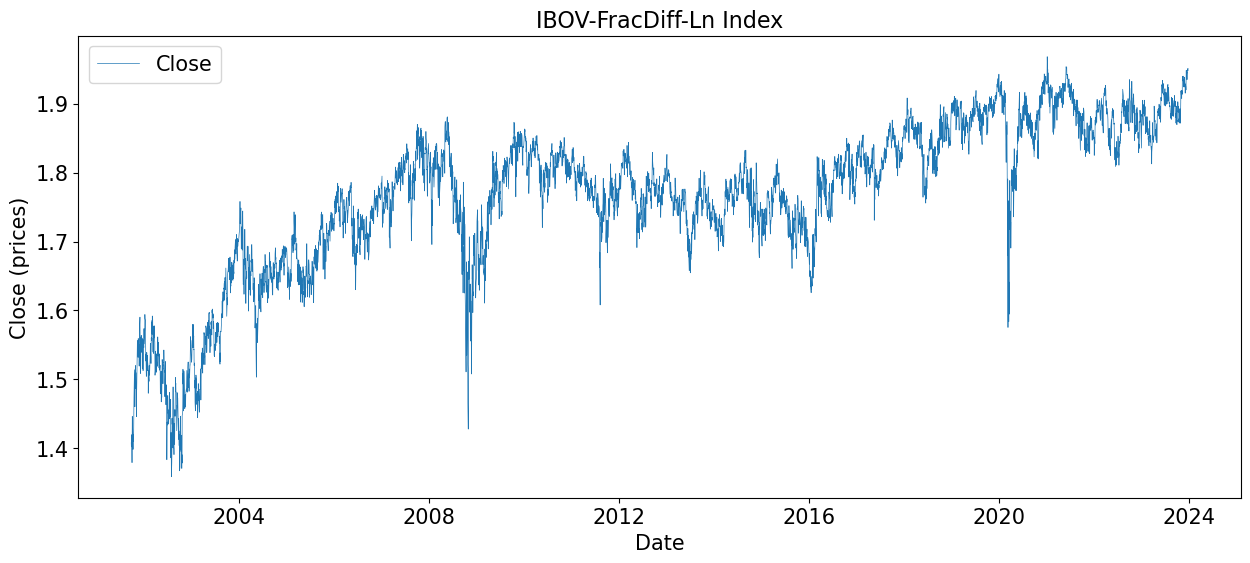

In [5]:
#===============================================================================================================================
# DATA: PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Close'], label = "Close", linewidth=0.5)
plt.title(seriesId+' Index', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close (prices)', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.show()


In [6]:
#===============================================================================================================================
# DATA: LOG
#===============================================================================================================================
dfln = df.copy()
#dfln['CloseLn']= np.log(dfln['Close'])
dfln['CloseLn']= dfln['Close']
dfln

Date     Close   CloseLn
0    2001-09-20  1.407736  1.407736
1    2001-09-21  1.402014  1.402014
2    2001-09-24  1.419516  1.419516
3    2001-09-25  1.391312  1.391312
4    2001-09-26  1.379019  1.379019
...         ...       ...       ...
5511 2023-12-21  1.945807  1.945807
5512 2023-12-22  1.946708  1.946708
5513 2023-12-26  1.949707  1.949707
5514 2023-12-27  1.951411  1.951411
5515 2023-12-28  1.948196  1.948196

[5516 rows x 3 columns]

In [7]:
#===============================================================================================================================
# DATA: LOG - SET INDEX
#===============================================================================================================================
dfln2 = dfln.set_index('Date')
dfln2

Close   CloseLn
Date                          
2001-09-20  1.407736  1.407736
2001-09-21  1.402014  1.402014
2001-09-24  1.419516  1.419516
2001-09-25  1.391312  1.391312
2001-09-26  1.379019  1.379019
...              ...       ...
2023-12-21  1.945807  1.945807
2023-12-22  1.946708  1.946708
2023-12-26  1.949707  1.949707
2023-12-27  1.951411  1.951411
2023-12-28  1.948196  1.948196

[5516 rows x 2 columns]

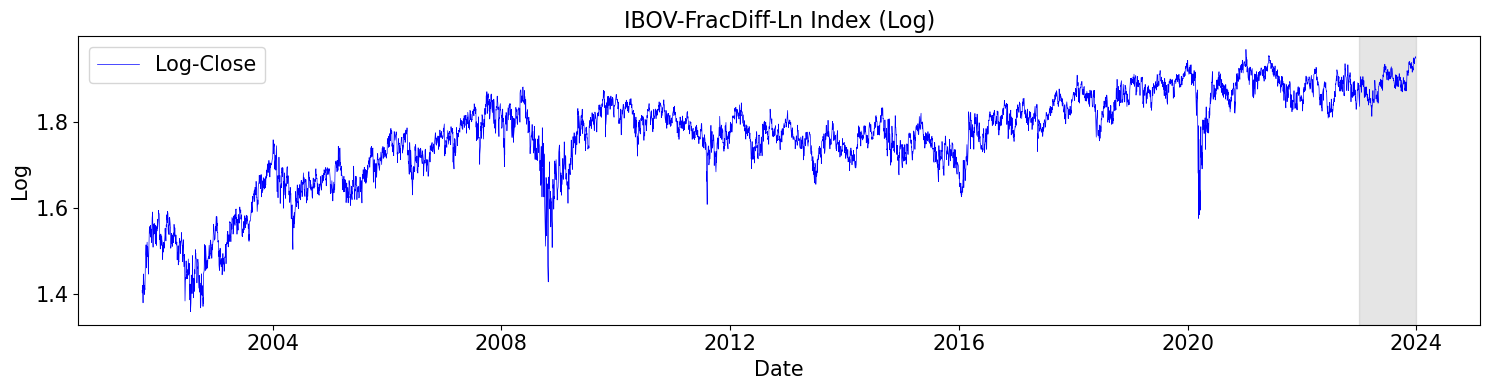

In [8]:
#===============================================================================================================================
# DATA: LOG - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,4))
plt.plot(dfln['Date'], dfln['CloseLn'], 'b-', label = "Log-Close", linewidth=0.5)
plt.title(seriesId+' Index (Log)', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.tight_layout()
plt.show()


In [9]:
#===============================================================================================================================
# DATA: LOG-DIFF
#===============================================================================================================================
dfln['CloseLnDiff'] = 0
dfln.loc[1:, ['CloseLnDiff']] = dfln.loc[:, 'CloseLn'].diff()
dfln

Date     Close   CloseLn  CloseLnDiff
0    2001-09-20  1.407736  1.407736     0.000000
1    2001-09-21  1.402014  1.402014    -0.005722
2    2001-09-24  1.419516  1.419516     0.017503
3    2001-09-25  1.391312  1.391312    -0.028204
4    2001-09-26  1.379019  1.379019    -0.012294
...         ...       ...       ...          ...
5511 2023-12-21  1.945807  1.945807     0.010692
5512 2023-12-22  1.946708  1.946708     0.000902
5513 2023-12-26  1.949707  1.949707     0.002998
5514 2023-12-27  1.951411  1.951411     0.001704
5515 2023-12-28  1.948196  1.948196    -0.003215

[5516 rows x 4 columns]

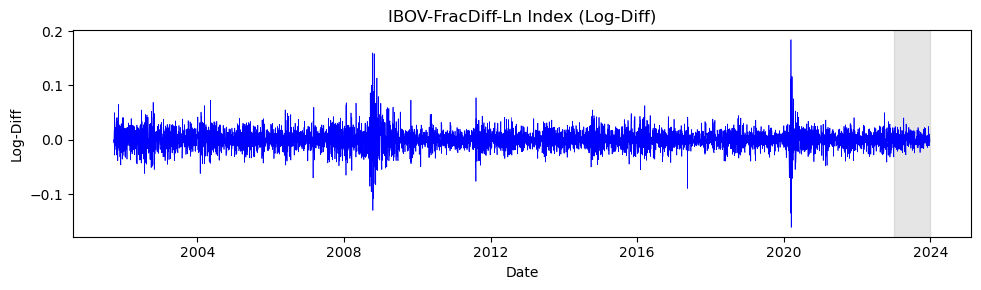

In [10]:
#===============================================================================================================================
# DATA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
plt.title(seriesId+' Index (Log-Diff)', fontsize=12)
ax.plot(dfln['Date'], dfln['CloseLnDiff'], 'b-', label = "Log-Diff Close", linewidth=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Log-Diff')
ax.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.tight_layout()

In [11]:
#===============================================================================================================================
# DATA: SPLIT
#===============================================================================================================================
totallen = len(df)
trainlen = len(df2[:'2022'])
testlen  = len(df2['2023':])

trainfin = trainlen-1
testini  = trainlen

train = df[:testini]
test  = df[testini:]

print("Train Len", trainlen, " | Length Total =", totallen, "| Train Fin =", trainfin, "| Test Ini =", testini)
#-------------------------------------------------------------------------------------------------------------------------------
# Train Len 5268 | Length Total = 5516 | Train Fin = 5267 | Test Ini = 5268
#-------------------------------------------------------------------------------------------------------------------------------
train

Train Len 5268  | Length Total = 5516 | Train Fin = 5267 | Test Ini = 5268


Date     Close
0    2001-09-20  1.407736
1    2001-09-21  1.402014
2    2001-09-24  1.419516
3    2001-09-25  1.391312
4    2001-09-26  1.379019
...         ...       ...
5263 2022-12-23  1.890757
5264 2022-12-26  1.875974
5265 2022-12-27  1.874472
5266 2022-12-28  1.889505
5267 2022-12-29  1.880656

[5268 rows x 2 columns]

In [12]:
################################################################################################################################
# ROLLING FORECAST
################################################################################################################################
from statsmodels.tsa.statespace.sarimax import SARIMAX

#===============================================================================================================================
# ROLLING FORECAST: PARAMETERS
#===============================================================================================================================
HORIZON = len(test)
WINDOW = 1

#===============================================================================================================================
# ROLLING FORECAST: FUNCTION
#===============================================================================================================================
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str, orderparam=(0,0,0)) -> list:   
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    elif method == 'last':
        pred_last = []
        
        for i in range(train_len, total_len, window):
            last = df.loc[i]
            pred_last.extend(last for _ in range(window))
        return pred_last
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ1 = {}, θ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_MA
    elif method == 'AR':
        pred_AR = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("phi1 = {}, phi2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_AR
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)  
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ = {}, σ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_ARMA

In [13]:
################################################################################################################################
# BASELINES
################################################################################################################################

#===============================================================================================================================
# BASELINES: LOG - FORECAST - last, mean
#===============================================================================================================================
pred_LastLn = rolling_forecast(dfln['CloseLn'], trainfin, HORIZON, WINDOW, 'last')
pred_MeanLn = rolling_forecast(dfln['CloseLn'], trainfin+1, HORIZON, WINDOW, 'mean')

#===============================================================================================================================
# BASELINES: LOG - COPY testln - last, mean 
#===============================================================================================================================
testln = dfln.loc[trainfin:,['Date','CloseLn']]
testln.loc[testini:,'pred_LastLn'] = pred_LastLn
testln.loc[testini:,'pred_MeanLn'] = pred_MeanLn

testln

Date   CloseLn  pred_LastLn  pred_MeanLn
5267 2022-12-29  1.880656          NaN          NaN
5268 2023-01-02  1.849074     1.880656     1.759646
5269 2023-01-03  1.835713     1.849074     1.759663
5270 2023-01-04  1.854988     1.835713     1.759678
5271 2023-01-05  1.877133     1.854988     1.759696
...         ...       ...          ...          ...
5511 2023-12-21  1.945807     1.935114     1.765413
5512 2023-12-22  1.946708     1.945807     1.765446
5513 2023-12-26  1.949707     1.946708     1.765479
5514 2023-12-27  1.951411     1.949707     1.765512
5515 2023-12-28  1.948196     1.951411     1.765546

[249 rows x 4 columns]

In [14]:
#===============================================================================================================================
# BASELINES: LOG - COPY dfln - last, mean 
#===============================================================================================================================
dfln['pred_LastLn'] = 0.0
dfln['pred_MeanLn'] = 0.0

dfln.loc[testini:,'pred_LastLn']=testln.loc[testini:,'pred_LastLn']
dfln.loc[testini:,'pred_MeanLn']=testln.loc[testini:,'pred_MeanLn']

dfln[testini-1:]


Date     Close   CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn
5267 2022-12-29  1.880656  1.880656    -0.008849     0.000000     0.000000
5268 2023-01-02  1.849074  1.849074    -0.031582     1.880656     1.759646
5269 2023-01-03  1.835713  1.835713    -0.013361     1.849074     1.759663
5270 2023-01-04  1.854988  1.854988     0.019275     1.835713     1.759678
5271 2023-01-05  1.877133  1.877133     0.022145     1.854988     1.759696
...         ...       ...       ...          ...          ...          ...
5511 2023-12-21  1.945807  1.945807     0.010692     1.935114     1.765413
5512 2023-12-22  1.946708  1.946708     0.000902     1.945807     1.765446
5513 2023-12-26  1.949707  1.949707     0.002998     1.946708     1.765479
5514 2023-12-27  1.951411  1.951411     0.001704     1.949707     1.765512
5515 2023-12-28  1.948196  1.948196    -0.003215     1.951411     1.765546

[249 rows x 6 columns]

In [15]:
#===============================================================================================================================
# BASELINES: LOG - PERFORMANCE - last, mean
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log      MSE    RMSE
#------------------------
# 0 Last  0.0001  0.0112
# 1 Mean  0.0174  0.1320
#-------------------------------------------------------------------------------------------------------------------------------

Log     MSE    RMSE
0  Last  0.0001  0.0112
1  Mean  0.0174   0.132

Text(0, 0.5, 'Log')

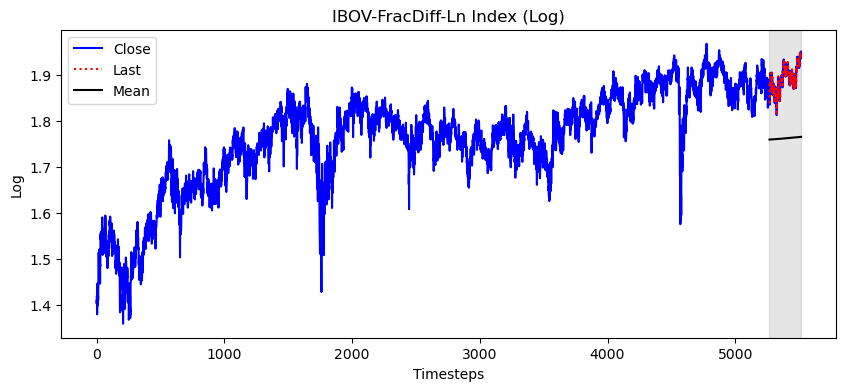

In [16]:
#===============================================================================================================================
# BASELINES: LOG - PLOT - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln['CloseLn'], 'b-', label='Close')
ax3.plot(dfln.loc[testini:,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')

Text(0, 0.5, 'Log')

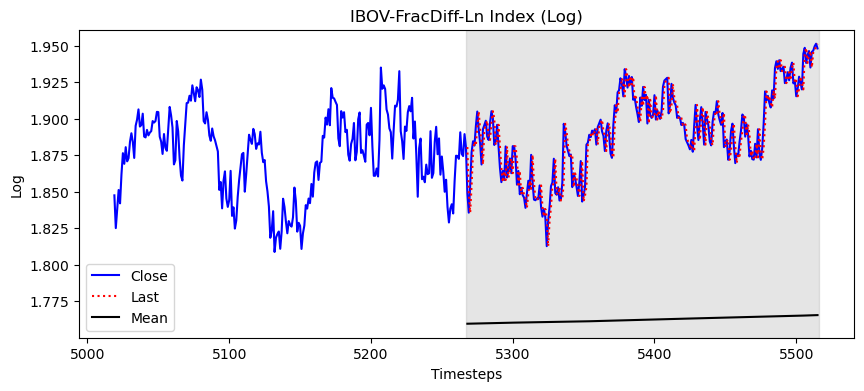

In [17]:
#===============================================================================================================================
# BASELINES: LOG - Plot (zoom) - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln.loc[trainfin-testlen:,'CloseLn'    ], 'b-', label='Close')
ax3.plot(dfln.loc[testini:  ,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:  ,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(trainfin, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')


In [18]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER
#===============================================================================================================================
df['pred_Last'] = 0.0
df['pred_Mean'] = 0.0


pred_Last = rolling_forecast(dfln['Close'], trainfin, HORIZON, WINDOW, 'last')
pred_Mean = rolling_forecast(dfln['Close'], trainfin+1, HORIZON, WINDOW, 'mean')

df.loc[testini:,'pred_Last']= pred_Last
df.loc[testini:,'pred_Mean']= np.round(pred_Mean,2)


df[testini-1:]

Date     Close  pred_Last  pred_Mean
5267 2022-12-29  1.880656   0.000000       0.00
5268 2023-01-02  1.849074   1.880656       1.76
5269 2023-01-03  1.835713   1.849074       1.76
5270 2023-01-04  1.854988   1.835713       1.76
5271 2023-01-05  1.877133   1.854988       1.76
...         ...       ...        ...        ...
5511 2023-12-21  1.945807   1.935114       1.77
5512 2023-12-22  1.946708   1.945807       1.77
5513 2023-12-26  1.949707   1.946708       1.77
5514 2023-12-27  1.951411   1.949707       1.77
5515 2023-12-28  1.948196   1.951411       1.77

[249 rows x 4 columns]

In [19]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Price        MSE   RMSE
#---------------------------
# 0 Last      0.0001 0.0112
# 1 Mean      0.0179 0.1337
#-------------------------------------------------------------------------------------------------------------------------------

Price     MSE    RMSE
0  Last  0.0001  0.0112
1  Mean  0.0179  0.1337

Text(0, 0.5, 'Prices')

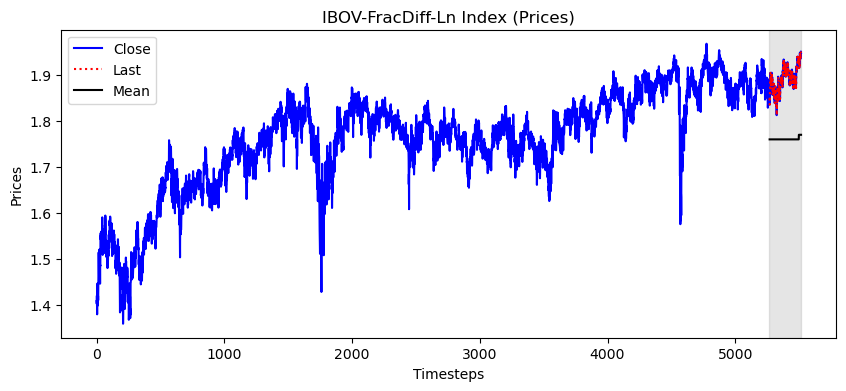

In [20]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df['Close'], 'b-', label='Close')
ax3.plot(df.loc[testini+1:,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

Text(0, 0.5, 'Prices')

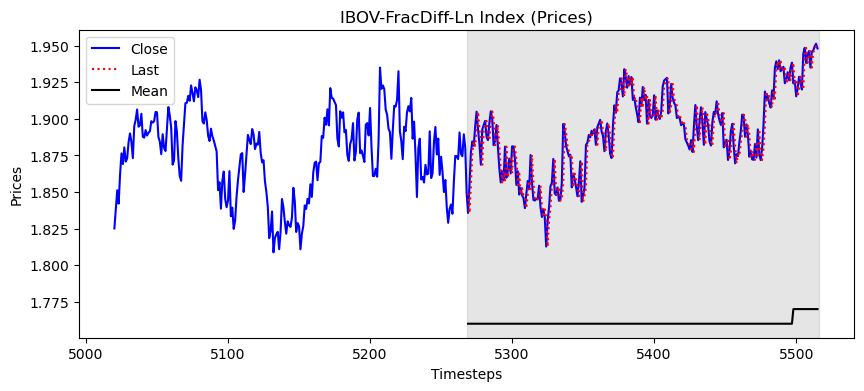

In [21]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT (zoom)
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df.loc[testini-testlen:,'Close'    ], 'b-', label='Close')
ax3.plot(df.loc[testini+1:  ,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:  ,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

In [22]:
################################################################################################################################
# STATIONARITY
################################################################################################################################

#===============================================================================================================================
# STATIONARITY: LOG - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -3.078
# ADF p-value  : 0.03 < 0.05
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -3.078
ADF p-value  : 0.03


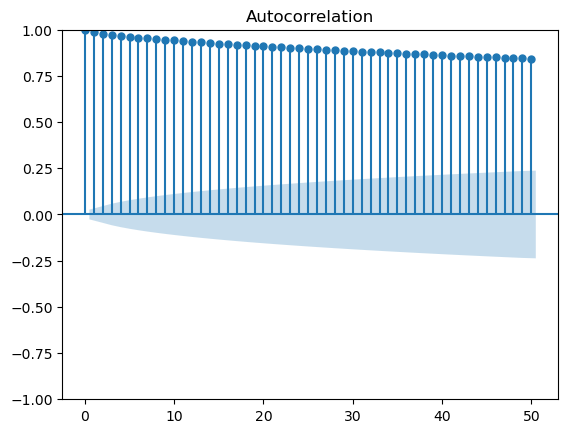

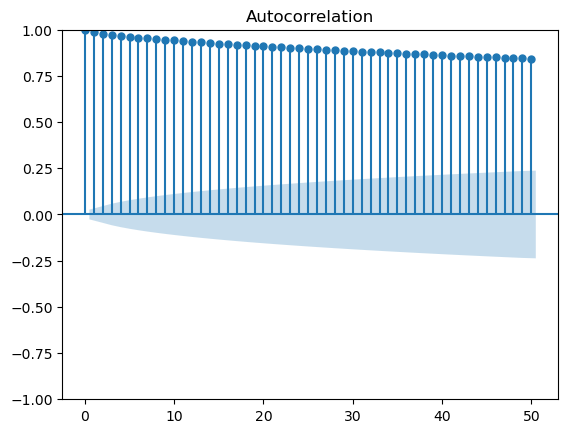

In [23]:
#===============================================================================================================================
# STATIONARITY: LOG - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLn'], lags=50)

#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients slowly decreasing after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION present ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM-WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [24]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -20.363
# ADF p-value  : 0.0
# Null hypothesis rejected - No Unit Root
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -20.363
ADF p-value  : 0.0


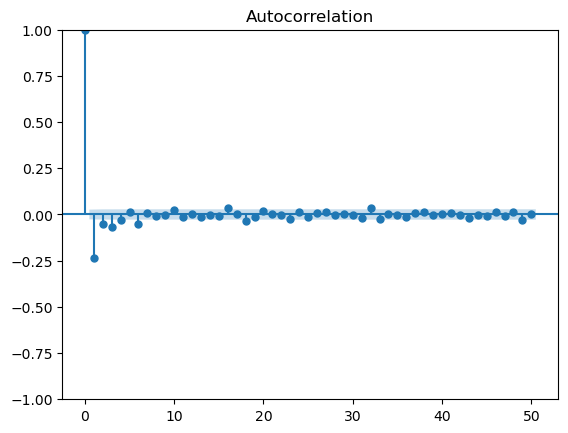

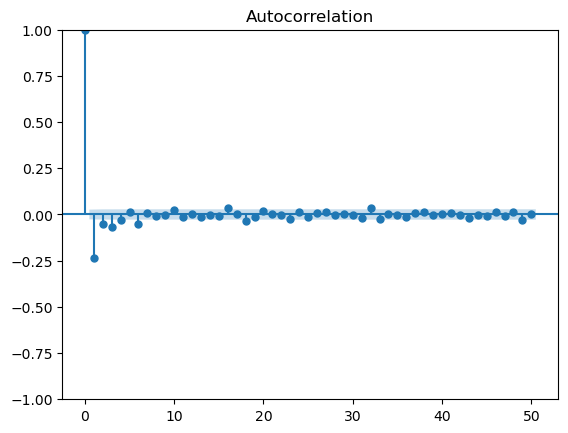

In [25]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLnDiff'], lags=50)
#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients after lag 0: 1* (2,3,4,6 almost non-significant)
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION *****
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG-DIFF - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [26]:
###############################################################################################################################
#
# MOVING AVERAGE (MA)
#
###############################################################################################################################

In [27]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - ADF Test & ACF Plot
#===============================================================================================================================

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Stationary
# ACF Plot: No Significant Coefficients after lag 0: 1* (2,3,4,6 almost non-significant)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY + AUTOCORRELATION => NO RANDOM WALK => MOVING AVERAGE MA(1) or MA(6) *****
#-------------------------------------------------------------------------------------------------------------------------------

In [28]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - FORECAST
#===============================================================================================================================
pred_MALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'MA',(0,0,6))
pred_MALnDiff

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5515
# Model:               SARIMAX(0, 0, 6)   Log Likelihood               14556.499
# Date:                Tue, 21 May 2024   AIC                         -29098.998
# Time:                        17:17:44   BIC                         -29052.692
# Sample:                             0   HQIC                        -29082.849
#                                - 5515                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.2969      0.007    -40.927      0.000      -0.311      -0.283
# ma.L2         -0.0897      0.006    -14.081      0.000      -0.102      -0.077
# ma.L3         -0.0895      0.007    -12.149      0.000      -0.104      -0.075
# ma.L4         -0.0376      0.008     -4.611      0.000      -0.054      -0.022
# ma.L5        8.38e-05      0.009      0.010      0.992      -0.017       0.017
# ma.L6         -0.0567      0.008     -7.157      0.000      -0.072      -0.041
# sigma2         0.0003   2.82e-06    105.824      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12067.95
# Prob(Q):                              0.95   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.59   Skew:                            -0.31
# Prob(H) (two-sided):                  0.00   Kurtosis:                        10.22
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ1 = -0.2969087730367353, θ2 = -0.08973892292525641
#
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                 5515
Model:               SARIMAX(0, 0, 6)   Log Likelihood               14556.499
Date:                Thu, 13 Jun 2024   AIC                         -29098.998
Time:                        18:25:59   BIC                         -29052.692
Sample:                             0   HQIC                        -29082.849
                               - 5515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2969      0.007    -40.927      0.000      -0.311      -0.283
ma.L2         -0.0897      0.006    -14.081      0.000      -0.102      -0.077
ma.L3         -0.0895      0.007    -12.149      0.0

[-0.0005055802938363125,
 0.00671712582126153,
 0.008729137922707443,
 0.0015559795248320067,
 -0.005085192673606357,
 -0.005612465989700261,
 -0.002430189838353953,
 -0.005673359112031294,
 -0.0073831450772810355,
 -0.002648405101121616,
 -0.00022668027750996565,
 0.00454624966326654,
 -0.00463796089936907,
 -0.0033562487851151817,
 -0.003492620884666027,
 0.0006206056168484362,
 0.0014898125721836538,
 -0.0035239259646736775,
 -0.004180647767543264,
 -0.0019580416523890653,
 0.0039001640812812016,
 0.0015966054045756424,
 -0.001808396458877518,
 0.0030036462198817526,
 0.0057604628136943194,
 0.007915097044250167,
 0.0036500117713374283,
 0.004471115869040027,
 -0.0033261085828809656,
 0.005596304023842899,
 0.00145211869623443,
 -0.0010551205452455613,
 0.0034281151913140547,
 -0.005365976673315086,
 -0.001331870787458048,
 0.0007767191704846955,
 0.004668341019100424,
 0.0012400437973981463,
 0.005774191832588101,
 0.0019046108481563023,
 0.003926705605072825,
 0.004136204590604094

In [29]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - COPY  testln
#===============================================================================================================================
testln.loc[testini:,'pred_MALnDiff'] = 0
testln.loc[testini:,'pred_MALnDiff'] = pred_MALnDiff
testln.loc[testini:,'pred_MALnDiff'].to_excel('Data/Output/Rolling-Ln-Daily-ARMA FracDiff-MALnDiff.xlsx')

testln

Date   CloseLn  pred_LastLn  pred_MeanLn  pred_MALnDiff
5267 2022-12-29  1.880656          NaN          NaN            NaN
5268 2023-01-02  1.849074     1.880656     1.759646      -0.000506
5269 2023-01-03  1.835713     1.849074     1.759663       0.006717
5270 2023-01-04  1.854988     1.835713     1.759678       0.008729
5271 2023-01-05  1.877133     1.854988     1.759696       0.001556
...         ...       ...          ...          ...            ...
5511 2023-12-21  1.945807     1.935114     1.765413       0.000580
5512 2023-12-22  1.946708     1.945807     1.765446      -0.003492
5513 2023-12-26  1.949707     1.946708     1.765479      -0.001251
5514 2023-12-27  1.951411     1.949707     1.765512      -0.002592
5515 2023-12-28  1.948196     1.951411     1.765546      -0.002760

[249 rows x 5 columns]

In [30]:
dfln.loc[testini:,'CloseLnDiff']

5268   -0.031582
5269   -0.013361
5270    0.019275
5271    0.022145
5272    0.007486
          ...   
5511    0.010692
5512    0.000902
5513    0.002998
5514    0.001704
5515   -0.003215
Name: CloseLnDiff, Length: 248, dtype: float64

In [31]:
#===============================================================================================================================
# MA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log Diff       MSE      RMSE
#-------------------------------
# 0 MA        0.000117  0.010839
#-------------------------------------------------------------------------------------------------------------------------------

Log Diff       MSE      RMSE
0       MA  0.000117  0.010839

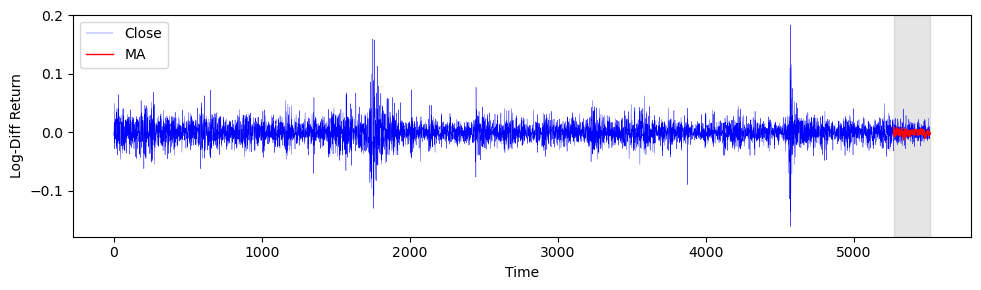

In [32]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[:testini+1,'CloseLnDiff']        ,'b-', linewidth=0.25) 
ax.plot(dfln.loc[testini+1:totallen,'CloseLnDiff'],'b-', linewidth=0.25, label='Close')
ax.plot(testln.loc[:totallen,'pred_MALnDiff']     ,'r-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
#plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


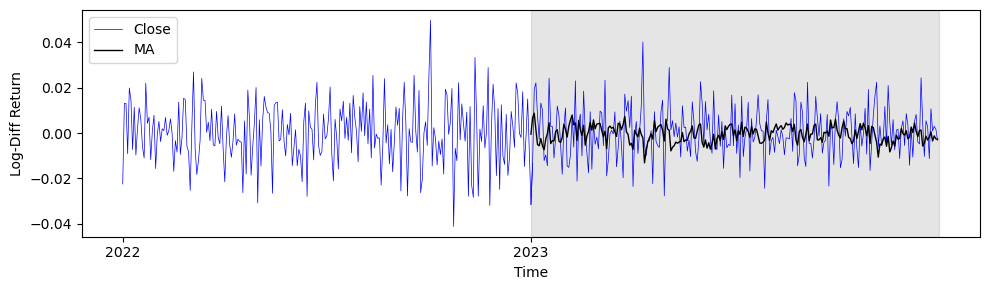

In [33]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],'b-', linewidth=0.5) 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff']         ,'b-', linewidth=0.5, label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff']     ,'k-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


In [34]:
#===============================================================================================================================
# MA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_MALn'] = 0.0
dfln.loc[testini:,'pred_MALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_MALnDiff']
dfln[testini-1:]


Date     Close   CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn  \
5267 2022-12-29  1.880656  1.880656    -0.008849     0.000000     0.000000   
5268 2023-01-02  1.849074  1.849074    -0.031582     1.880656     1.759646   
5269 2023-01-03  1.835713  1.835713    -0.013361     1.849074     1.759663   
5270 2023-01-04  1.854988  1.854988     0.019275     1.835713     1.759678   
5271 2023-01-05  1.877133  1.877133     0.022145     1.854988     1.759696   
...         ...       ...       ...          ...          ...          ...   
5511 2023-12-21  1.945807  1.945807     0.010692     1.935114     1.765413   
5512 2023-12-22  1.946708  1.946708     0.000902     1.945807     1.765446   
5513 2023-12-26  1.949707  1.949707     0.002998     1.946708     1.765479   
5514 2023-12-27  1.951411  1.951411     0.001704     1.949707     1.765512   
5515 2023-12-28  1.948196  1.948196    -0.003215     1.951411     1.765546   

      pred_MALn  
5267   0.000000  
5268   1.880151  
5269   1.855791  
5270   1.844442  
5271   1.856544  
...         ...  
5511   1.935694  
5512   1.942315  
5513   1.945457  
5514   1.947114  
5515   1.948651  

[249 rows x 7 columns]

In [35]:
#===============================================================================================================================
# MA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------------------------------------------------------
#    Log   MSE       RMSE
#----------------------------
# 0  Last  0.000125  0.011162
# 1  Mean  0.017434  0.132040
# 2  MA    0.000117  0.010839
#-------------------------------------------------------------------------------------------------------------------------------

Log       MSE      RMSE
0  Last  0.000125  0.011162
1  Mean  0.017434   0.13204
2    MA  0.000117  0.010839

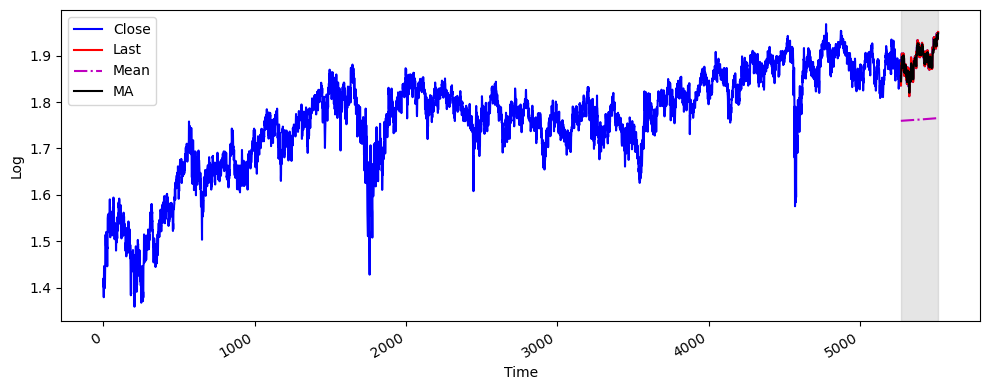

In [36]:
#===============================================================================================================================
# MA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2002, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


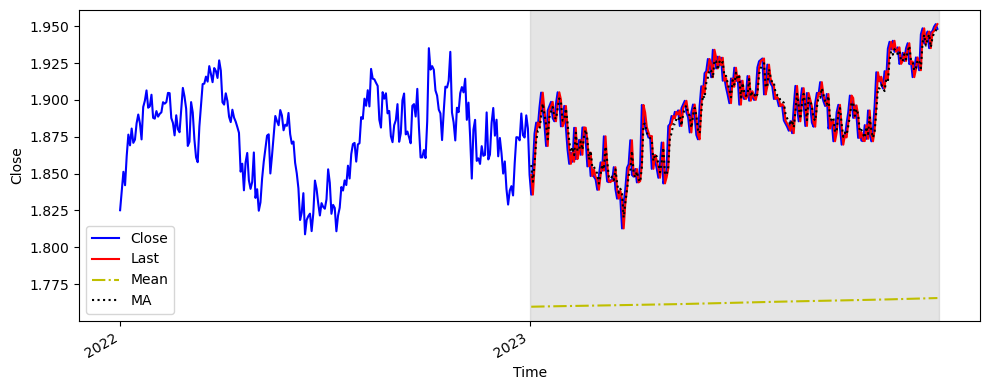

In [37]:
#===============================================================================================================================
# MA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn']  , 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn']  , 'y-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [38]:
#===============================================================================================================================
# MA: PRICE - RECOVER
#===============================================================================================================================
df['pred_MA'] = 0.0
#df.loc[testini:,'pred_MA']= np.round(np.exp(dfln.loc[testini:,'pred_MALn']),2)
df.loc[testini:,'pred_MA']= np.round(dfln.loc[testini:,'pred_MALn'],6)

df[testini-1:]

Date     Close  pred_Last  pred_Mean   pred_MA
5267 2022-12-29  1.880656   0.000000       0.00  0.000000
5268 2023-01-02  1.849074   1.880656       1.76  1.880151
5269 2023-01-03  1.835713   1.849074       1.76  1.855791
5270 2023-01-04  1.854988   1.835713       1.76  1.844442
5271 2023-01-05  1.877133   1.854988       1.76  1.856544
...         ...       ...        ...        ...       ...
5511 2023-12-21  1.945807   1.935114       1.77  1.935694
5512 2023-12-22  1.946708   1.945807       1.77  1.942315
5513 2023-12-26  1.949707   1.946708       1.77  1.945457
5514 2023-12-27  1.951411   1.949707       1.77  1.947114
5515 2023-12-28  1.948196   1.951411       1.77  1.948651

[249 rows x 5 columns]

In [39]:
#===============================================================================================================================
# MA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),4))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA  ),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price        MSE    RMSE
#------------------------------
# 0  Last    0.000125  0.0112
# 1  Mean    0.017872  0.1337
# 2  MA      0.000117  0.0108
#-------------------------------------------------------------------------------------------------------------------------------

Price       MSE    RMSE
0  Last  0.000125  0.0112
1  Mean  0.017872  0.1337
2    MA  0.000117  0.0108

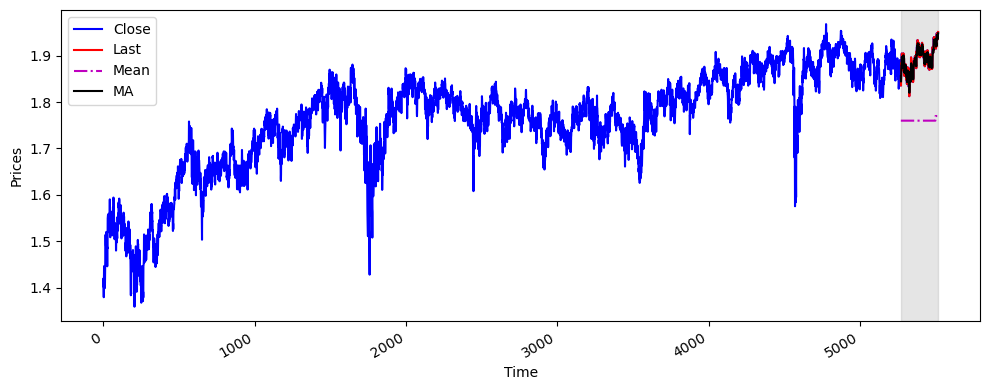

In [40]:
#===============================================================================================================================
# MA: PRICES - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Prices')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

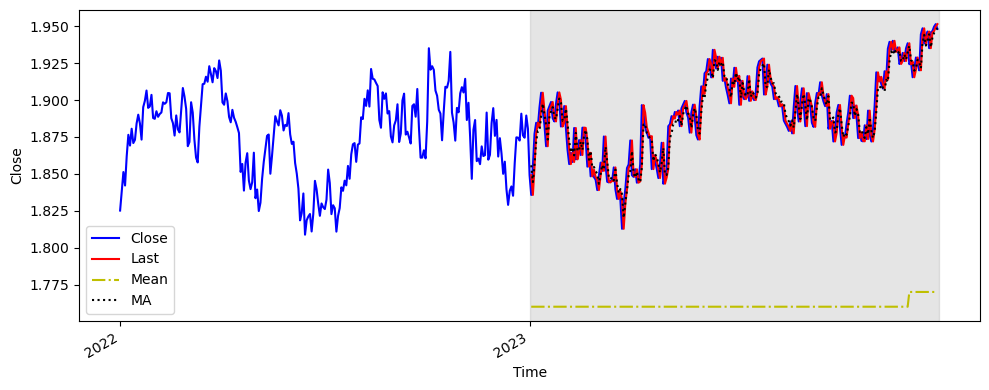

In [41]:
#===============================================================================================================================
# MA: PRICES - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last']  , 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean']  , 'y-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [42]:
################################################################################################################################
#
# AUTOREGRESSIVE (AR)
#
################################################################################################################################

In [43]:
#===============================================================================================================================
# AR: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Statistics, p-value -> Non Stationary
# ACF Plot: Slowing decaying -> AutoCorrelation present
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

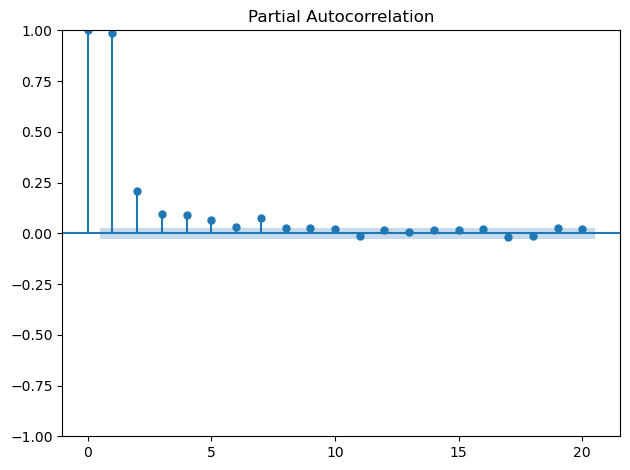

In [44]:
#===============================================================================================================================
# AR: LOG - PACF Plot -  AR(p) order
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLn'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - order 7 AR(7)
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(7) process ******
#-------------------------------------------------------------------------------------------------------------------------------

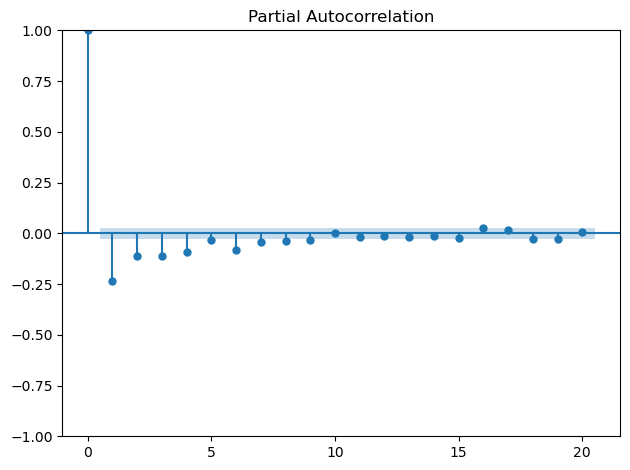

In [45]:
#===============================================================================================================================
# AR: LOG-DIFF - PACF Plot - Identifies the order p of AR process
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLnDiff'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - NO AUTOCORRELATION
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(6) process ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# AR: LOG-DIFF - ADF Test + PACF Plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ****** NO RANDOM WALK ******
#-------------------------------------------------------------------------------------------------------------------------------

In [46]:
#===============================================================================================================================
# AR: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARLnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'AR', (6,0,0))

testln.loc[testini:,'pred_ARLnDiff'] = 0
testln.loc[testini:,'pred_ARLnDiff'] = pred_ARLnDiff
testln.loc[testini:,'pred_ARLnDiff'].to_excel('Data/Output/Rolling-Ln-Daily-ARMA FracDiff-ARLnDiff.xlsx')
testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5515
# Model:               SARIMAX(6, 0, 0)   Log Likelihood               14543.463
# Date:                Tue, 21 May 2024   AIC                         -29072.927
# Time:                        20:14:23   BIC                         -29026.620
# Sample:                             0   HQIC                        -29056.777
#                                - 5515                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.2879      0.007    -40.054      0.000      -0.302      -0.274
# ar.L2         -0.1669      0.007    -23.995      0.000      -0.181      -0.153
# ar.L3         -0.1547      0.008    -19.680      0.000      -0.170      -0.139
# ar.L4         -0.1128      0.008    -13.928      0.000      -0.129      -0.097
# ar.L5         -0.0583      0.007     -7.922      0.000      -0.073      -0.044
# ar.L6         -0.0835      0.008    -10.749      0.000      -0.099      -0.068
# sigma2         0.0003   2.84e-06    105.413      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             11582.37
# Prob(Q):                              0.76   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.58   Skew:                            -0.19
# Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# phi1 = -0.28790196702924653, phi2 = -0.16693467348313765
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                 5515
Model:               SARIMAX(6, 0, 0)   Log Likelihood               14543.463
Date:                Thu, 13 Jun 2024   AIC                         -29072.927
Time:                        18:32:32   BIC                         -29026.620
Sample:                             0   HQIC                        -29056.777
                               - 5515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2879      0.007    -40.054      0.000      -0.302      -0.274
ar.L2         -0.1669      0.007    -23.995      0.000      -0.181      -0.153
ar.L3         -0.1547      0.008    -19.680      0.0

Date   CloseLn  pred_LastLn  pred_MeanLn  pred_MALnDiff  \
5267 2022-12-29  1.880656          NaN          NaN            NaN   
5268 2023-01-02  1.849074     1.880656     1.759646      -0.000506   
5269 2023-01-03  1.835713     1.849074     1.759663       0.006717   
5270 2023-01-04  1.854988     1.835713     1.759678       0.008729   
5271 2023-01-05  1.877133     1.854988     1.759696       0.001556   
...         ...       ...          ...          ...            ...   
5511 2023-12-21  1.945807     1.935114     1.765413       0.000580   
5512 2023-12-22  1.946708     1.945807     1.765446      -0.003492   
5513 2023-12-26  1.949707     1.946708     1.765479      -0.001251   
5514 2023-12-27  1.951411     1.949707     1.765512      -0.002592   
5515 2023-12-28  1.948196     1.951411     1.765546      -0.002760   

      pred_ARLnDiff  
5267            NaN  
5268       0.001088  
5269       0.007824  
5270       0.010100  
5271       0.001795  
...             ...  
5511       0.000845  
5512      -0.001965  
5513      -0.000058  
5514      -0.002007  
5515      -0.001905  

[249 rows x 6 columns]

In [47]:
#===============================================================================================================================
# AR: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 2  MA      0.000117  0.010839
# 3  AR      0.000118  0.010875
#-------------------------------------------------------------------------------------------------------------------------------

Log Diff       MSE      RMSE
0       MA  0.000117  0.010839
1       AR  0.000118  0.010875

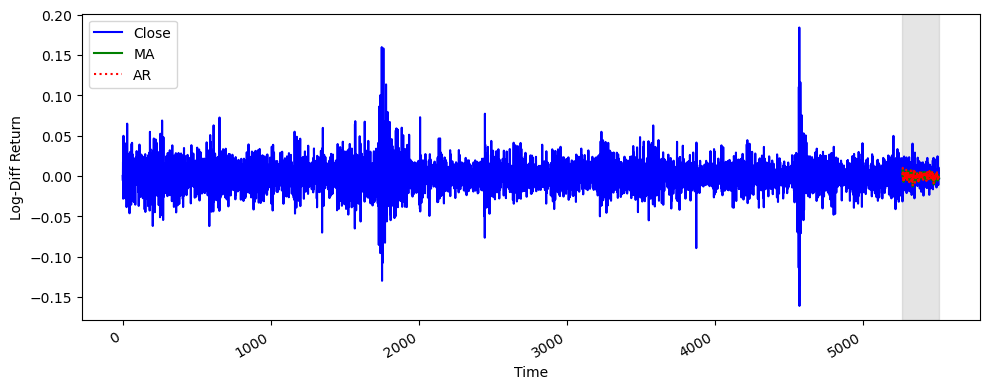

In [48]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']    , 'b-', label='Close')    
ax.plot(testln['pred_MALnDiff'], 'g-', label='MA')   
ax.plot(testln['pred_ARLnDiff'], 'r:', label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

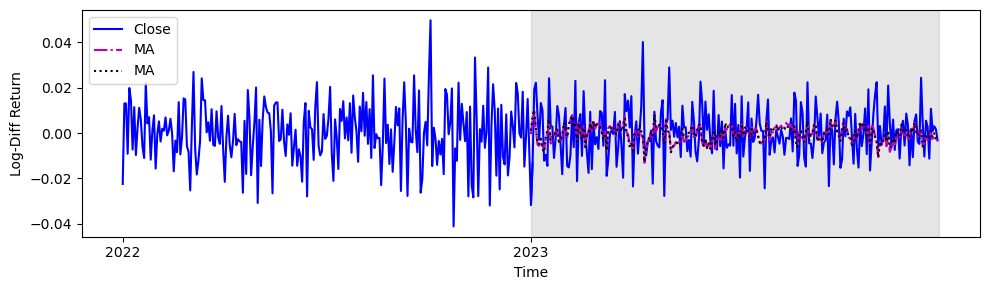

In [49]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],    'b-') 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff'],    'b-', label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff'],  'm-.', label='MA')
ax.plot(testln.loc[testini:totallen,'pred_ARLnDiff'],  'k:', label='MA')
ax.axvspan(testini,testini+testlen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()

In [50]:
#===============================================================================================================================
# AR: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARLn'] = 0.0
dfln.loc[testini:,'pred_ARLn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARLnDiff']
dfln[testini-1:]


Date     Close   CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn  \
5267 2022-12-29  1.880656  1.880656    -0.008849     0.000000     0.000000   
5268 2023-01-02  1.849074  1.849074    -0.031582     1.880656     1.759646   
5269 2023-01-03  1.835713  1.835713    -0.013361     1.849074     1.759663   
5270 2023-01-04  1.854988  1.854988     0.019275     1.835713     1.759678   
5271 2023-01-05  1.877133  1.877133     0.022145     1.854988     1.759696   
...         ...       ...       ...          ...          ...          ...   
5511 2023-12-21  1.945807  1.945807     0.010692     1.935114     1.765413   
5512 2023-12-22  1.946708  1.946708     0.000902     1.945807     1.765446   
5513 2023-12-26  1.949707  1.949707     0.002998     1.946708     1.765479   
5514 2023-12-27  1.951411  1.951411     0.001704     1.949707     1.765512   
5515 2023-12-28  1.948196  1.948196    -0.003215     1.951411     1.765546   

      pred_MALn  pred_ARLn  
5267   0.000000   0.000000  
5268   1.880151   1.881744  
5269   1.855791   1.856898  
5270   1.844442   1.845813  
5271   1.856544   1.856783  
...         ...        ...  
5511   1.935694   1.935959  
5512   1.942315   1.943841  
5513   1.945457   1.946650  
5514   1.947114   1.947700  
5515   1.948651   1.949506  

[249 rows x 8 columns]

In [51]:
#===============================================================================================================================
# AR: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6 ))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,6 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-----------------------------
#    Log   MSE       RMSE
#-----------------------------
# 0  Last  0.000125  0.011162
# 1  Mean  0.017434  0.13204
# 2  MA    0.000117  0.010839
# 3  AR    0.000118  0.010875
#-------------------------------------------------------------------------------------------------------------------------------

Log       MSE      RMSE
0  Last  0.000125  0.011162
1  Mean  0.017434   0.13204
2    MA  0.000117  0.010839
3    AR  0.000118  0.010875

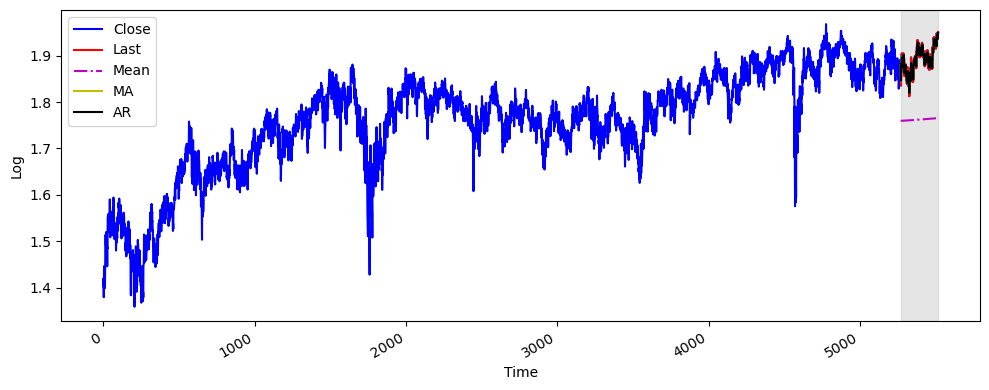

In [52]:
#===============================================================================================================================
# AR: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn']                 , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'k-' , label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


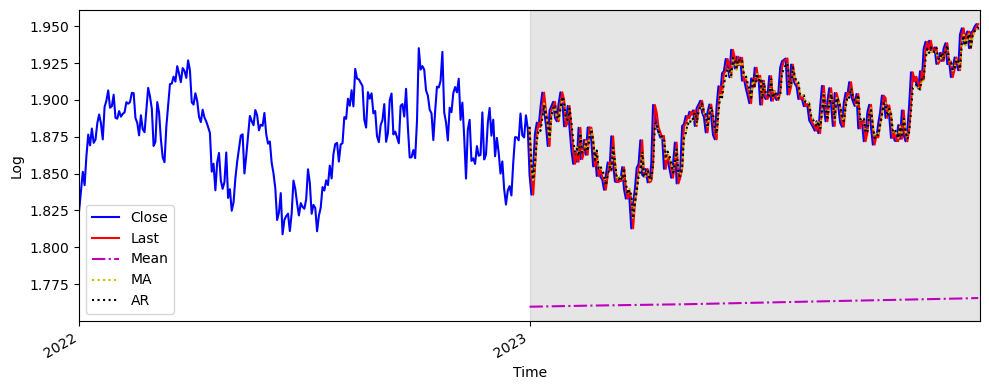

In [53]:
#===============================================================================================================================
# AR: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn']    , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']      , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']      , 'k:' , label='AR')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [54]:
#===============================================================================================================================
# AR: PRICES - RECOVER
#===============================================================================================================================
df['pred_AR'] = 0.0
df.loc[testini:,'pred_AR']= np.round(np.exp(dfln.loc[testini:,'pred_ARLn']),2)

df[testini-1:]

Date     Close  pred_Last  pred_Mean   pred_MA  pred_AR
5267 2022-12-29  1.880656   0.000000       0.00  0.000000     0.00
5268 2023-01-02  1.849074   1.880656       1.76  1.880151     6.56
5269 2023-01-03  1.835713   1.849074       1.76  1.855791     6.40
5270 2023-01-04  1.854988   1.835713       1.76  1.844442     6.33
5271 2023-01-05  1.877133   1.854988       1.76  1.856544     6.40
...         ...       ...        ...        ...       ...      ...
5511 2023-12-21  1.945807   1.935114       1.77  1.935694     6.93
5512 2023-12-22  1.946708   1.945807       1.77  1.942315     6.99
5513 2023-12-26  1.949707   1.946708       1.77  1.945457     7.01
5514 2023-12-27  1.951411   1.949707       1.77  1.947114     7.01
5515 2023-12-28  1.948196   1.951411       1.77  1.948651     7.03

[249 rows x 6 columns]

In [55]:
#===============================================================================================================================
# AR: PRICES - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  4))  , "{:,}".format(round(sqrt(mse_MA  ),4))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  4))  , "{:,}".format(round(sqrt(mse_AR  ),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price          MSE   RMSE
#--------------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,478,265  1,216
# 
#-------------------------------------------------------------------------------------------------------------------------------

Price     MSE    RMSE
0  Last  0.0001  0.0112
1  Mean  0.0179  0.1337
2    MA  0.0001  0.0108
3    AR  22.465  4.7397

In [56]:
################################################################################################################################
#
# ARMA
#
################################################################################################################################

#===============================================================================================================================
# ARMA: OPTIMIZE Function - AIC (Akaike Information Criterion)
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
             continue
        
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [57]:
#===============================================================================================================================
# ARMA: TRAIN SET
#===============================================================================================================================
train = df.Close[:trainfin+1]
trainLn = dfln.CloseLn[:trainfin+1]
trainLnDiff = dfln.CloseLnDiff[:trainfin+1]
trainLnDiff

0       0.000000
1      -0.005722
2       0.017503
3      -0.028204
4      -0.012294
          ...   
5263    0.018202
5264   -0.014783
5265   -0.001502
5266    0.015033
5267   -0.008849
Name: CloseLnDiff, Length: 5268, dtype: float64

In [75]:
#===============================================================================================================================
# ARMA: PARAMETERS ps, qs
#===============================================================================================================================
from itertools import product
ps = range(0, 1, 1)    
qs = range(0, 3, 1)     

order_list = list(product(ps, qs))
len(order_list)

3

In [76]:
#===============================================================================================================================
# ARMA: Optimize_ARMA
#===============================================================================================================================
result_df = optimize_ARMA(trainLn, order_list) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 10, 1)    
# qs = range(0, 10, 1)     
#
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 100/100 [06:10<00:00, 8.70s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#     (p,q)            AIC
# ------------------------
# 0  (3, 8)  -27621.294898
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_12872\3345244493.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/3 [00:00<?, ?it/s]

(p,q)           AIC
0  (0, 2)   7154.217552
1  (0, 1)  13737.254367
2  (0, 0)  20926.438259

In [79]:
#===============================================================================================================================
# ARMA: LOG - ROLLING FORECAST
#===============================================================================================================================
pred_ARMALn = rolling_forecast(dfln['CloseLn'], testini, HORIZON, WINDOW, 'ARMA',(0,0,2))

testln.loc[testini:,'pred_ARMALn'] = 0
testln.loc[testini:,'pred_ARMALn'] = pred_ARMALn
testln.loc[testini:,'pred_ARMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARMA FracDiff-ARMALn.xlsx')
testln

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5515
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -3754.102
Date:                Thu, 13 Jun 2024   AIC                           7514.203
Time:                        19:58:06   BIC                           7534.049
Sample:                             0   HQIC                          7521.124
                               - 5515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.8537      0.005    365.731      0.000       1.844       1.864
ma.L2          0.9516      0.005    188.203      0.000       0.942       0.961
sigma2         0.2281      0.017     13.749      0.0

Date   CloseLn  pred_LastLn  pred_MeanLn  pred_MALnDiff  \
5267 2022-12-29  1.880656          NaN          NaN            NaN   
5268 2023-01-02  1.849074     1.880656     1.759646      -0.000506   
5269 2023-01-03  1.835713     1.849074     1.759663       0.006717   
5270 2023-01-04  1.854988     1.835713     1.759678       0.008729   
5271 2023-01-05  1.877133     1.854988     1.759696       0.001556   
...         ...       ...          ...          ...            ...   
5511 2023-12-21  1.945807     1.935114     1.765413       0.000580   
5512 2023-12-22  1.946708     1.945807     1.765446      -0.003492   
5513 2023-12-26  1.949707     1.946708     1.765479      -0.001251   
5514 2023-12-27  1.951411     1.949707     1.765512      -0.002592   
5515 2023-12-28  1.948196     1.951411     1.765546      -0.002760   

      pred_ARLnDiff  pred_ARMALnDiff  pred_ARMALn  
5267            NaN              NaN          NaN  
5268       0.001088        -0.000506     1.311533  
5269       0.007824         0.006717     1.409071  
5270       0.010100         0.008729     1.301271  
5271       0.001795         0.001556     1.431165  
...             ...              ...          ...  
5511       0.000845         0.000580     1.421458  
5512      -0.001965        -0.003492     1.448532  
5513      -0.000058        -0.001251     1.422407  
5514      -0.002007        -0.002592     1.451496  
5515      -0.001905        -0.002760     1.428452  

[249 rows x 8 columns]

In [80]:
testln.loc[testini:,'pred_ARMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARMA FracDiff-ARMALn.xlsx')

In [61]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARMALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 0  MA      0.000117  0.010839
# 1  AR      0.000118  0.010875
# 2  ARMA    0.000117  0.010839
#-------------------------------------------------------------------------------------------------------------------------------

Log Diff       MSE      RMSE
0       MA  0.000117  0.010839
1       AR  0.000118  0.010875
2     ARMA  0.000117  0.010839

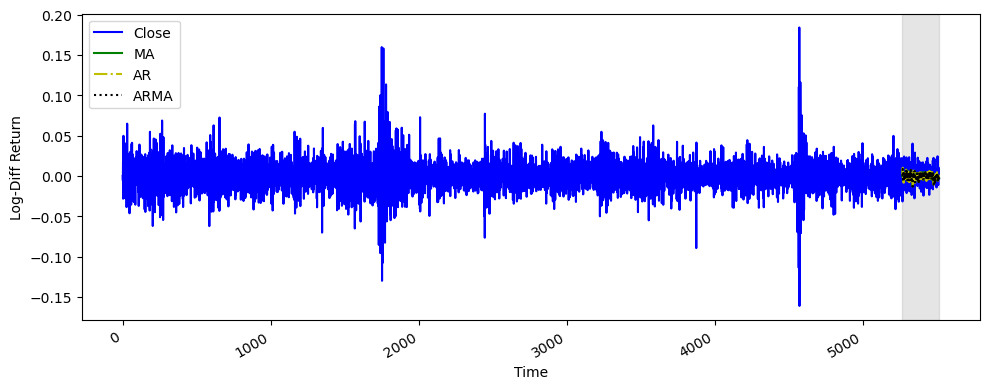

In [62]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']      , 'b-' , label='Close')
ax.plot(testln['pred_MALnDiff']  , 'g-' , label='MA')
ax.plot(testln['pred_ARLnDiff']  , 'y-.', label='AR')
ax.plot(testln['pred_ARMALnDiff'], 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


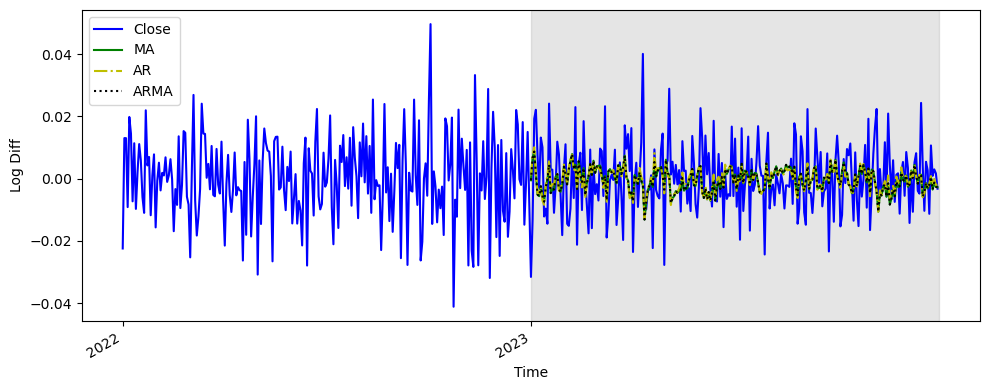

In [63]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLnDiff'], 'b-' , label='Close')
ax.plot(testln.loc[-testlen:,'pred_MALnDiff']   , 'g-' , label='MA')
ax.plot(testln.loc[-testlen:,'pred_ARLnDiff']   , 'y-.', label='AR')
ax.plot(testln.loc[-testlen:,'pred_ARMALnDiff'] , 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log Diff')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(testini-testlen, totallen, testlen), [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()



In [82]:
#===============================================================================================================================
# ARMA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARMALn2'] = 0.0
dfln.loc[testini:,'pred_ARMALn2'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARMALnDiff']
dfln.loc[testini:,'pred_ARMALn2'].to_excel('Data/Output/Rolling-Ln-Daily-ARMA FracDiff-ARMALn2.xlsx')
dfln[testini-1:]

Date     Close   CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn  \
5267 2022-12-29  1.880656  1.880656    -0.008849     0.000000     0.000000   
5268 2023-01-02  1.849074  1.849074    -0.031582     1.880656     1.759646   
5269 2023-01-03  1.835713  1.835713    -0.013361     1.849074     1.759663   
5270 2023-01-04  1.854988  1.854988     0.019275     1.835713     1.759678   
5271 2023-01-05  1.877133  1.877133     0.022145     1.854988     1.759696   
...         ...       ...       ...          ...          ...          ...   
5511 2023-12-21  1.945807  1.945807     0.010692     1.935114     1.765413   
5512 2023-12-22  1.946708  1.946708     0.000902     1.945807     1.765446   
5513 2023-12-26  1.949707  1.949707     0.002998     1.946708     1.765479   
5514 2023-12-27  1.951411  1.951411     0.001704     1.949707     1.765512   
5515 2023-12-28  1.948196  1.948196    -0.003215     1.951411     1.765546   

      pred_MALn  pred_ARLn  pred_ARMALn  pred_ARMALn2  
5267   0.000000   0.000000     0.000000      0.000000  
5268   1.880151   1.881744     1.880151      1.880151  
5269   1.855791   1.856898     1.855791      1.855791  
5270   1.844442   1.845813     1.844442      1.844442  
5271   1.856544   1.856783     1.856544      1.856544  
...         ...        ...          ...           ...  
5511   1.935694   1.935959     1.935694      1.935694  
5512   1.942315   1.943841     1.942315      1.942315  
5513   1.945457   1.946650     1.945457      1.945457  
5514   1.947114   1.947700     1.947114      1.947114  
5515   1.948651   1.949506     1.948651      1.948651  

[249 rows x 10 columns]

In [65]:
#===============================================================================================================================
# ARMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8))  , "{:,}".format(round(sqrt(mse_Mean) ,6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE      RMSE
#--------------------------------
# 0  Last  0.00012458  0.011162
# 1  Mean  0.01743443  0.132040
# 2  MA    0.00011749  0.010839
# 3  AR    0.00011827  0.010875
# 4  ARMA  0.00011749  0.010839
#-------------------------------------------------------------------------------------------------------------------------------

Log         MSE      RMSE
0  Last  0.00012458  0.011162
1  Mean  0.01743443   0.13204
2    MA  0.00011749  0.010839
3    AR  0.00011827  0.010875
4  ARMA  0.00011749  0.010839

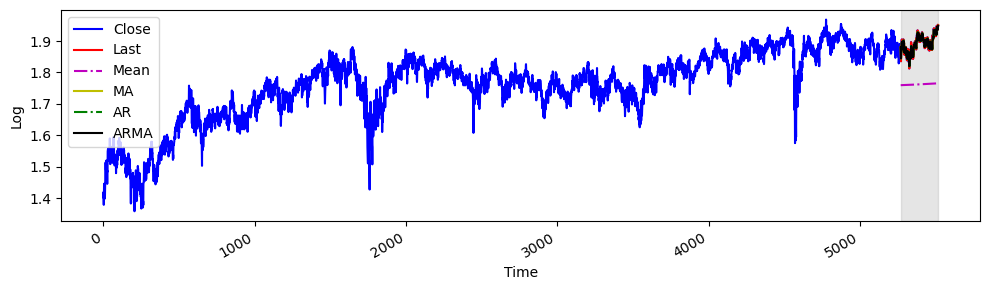

In [66]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'g-.', label='AR')   
ax.plot(dfln.loc[testini:,'pred_ARMALn'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


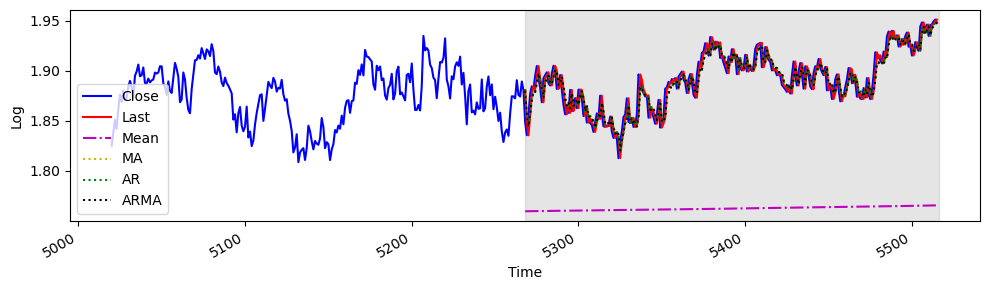

In [67]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'k:' , label='ARMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks([testini-totallen, totallen],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [68]:
#===============================================================================================================================
# ARMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARMA'] = 0.0
#df.loc[testini:,'pred_ARMA']= np.round(np.exp(dfln.loc[testini:,'pred_ARMALn']),2)
df.loc[testini:,'pred_ARMA']= np.round(dfln.loc[testini:,'pred_ARMALn'],2)

df[testini-1:]

Date     Close  pred_Last  pred_Mean   pred_MA  pred_AR  pred_ARMA
5267 2022-12-29  1.880656   0.000000       0.00  0.000000     0.00       0.00
5268 2023-01-02  1.849074   1.880656       1.76  1.880151     6.56       1.88
5269 2023-01-03  1.835713   1.849074       1.76  1.855791     6.40       1.86
5270 2023-01-04  1.854988   1.835713       1.76  1.844442     6.33       1.84
5271 2023-01-05  1.877133   1.854988       1.76  1.856544     6.40       1.86
...         ...       ...        ...        ...       ...      ...        ...
5511 2023-12-21  1.945807   1.935114       1.77  1.935694     6.93       1.94
5512 2023-12-22  1.946708   1.945807       1.77  1.942315     6.99       1.94
5513 2023-12-26  1.949707   1.946708       1.77  1.945457     7.01       1.95
5514 2023-12-27  1.951411   1.949707       1.77  1.947114     7.01       1.95
5515 2023-12-28  1.948196   1.951411       1.77  1.948651     7.03       1.95

[249 rows x 7 columns]

In [69]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Performance
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE     RMSE
#-----------------------------
# 0  Last    0.000125  0.011162
# 1  Mean    0.017872  0.133685
# 2  MA      0.000117  0.010839
# 3  AR     22.465036  4.739730
# 4  ARMA    0.000132  0.011491
#-------------------------------------------------------------------------------------------------------------------------------

Model        MSE      RMSE
0  Last   0.000125  0.011162
1  Mean   0.017872  0.133685
2    MA   0.000117  0.010839
3    AR  22.465036   4.73973
4  ARMA   0.000132  0.011491

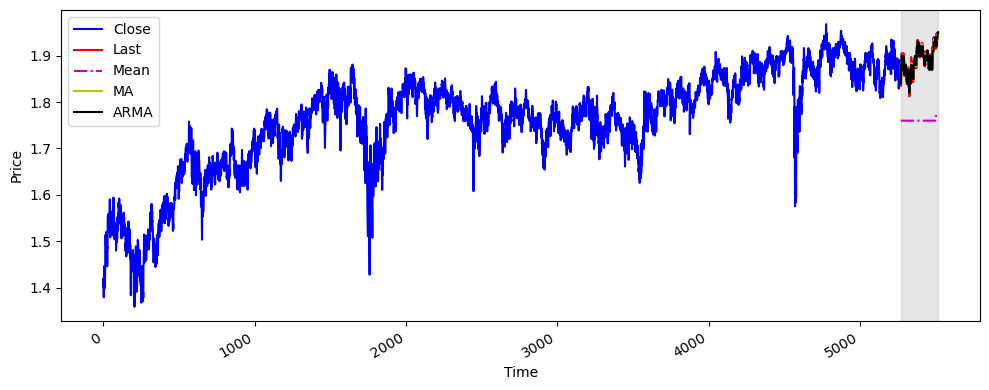

In [70]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y-' , label='MA')   
#ax.plot(df.loc[testini:,'pred_AR']  , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

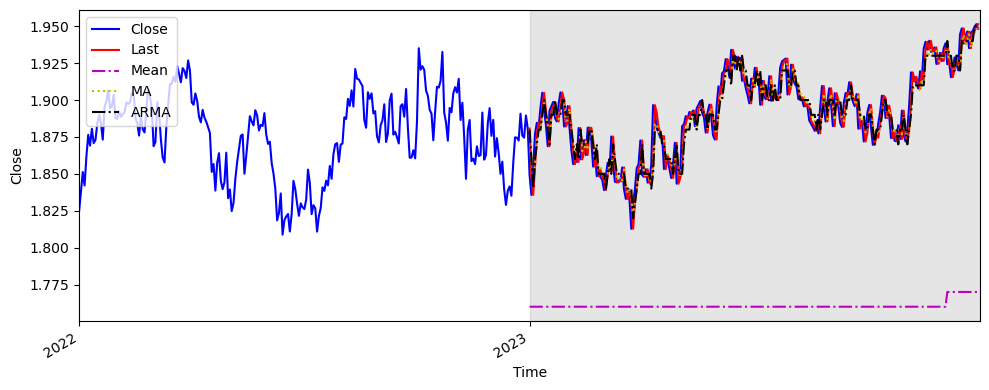

In [71]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close']  , 'b-' , label='Close')
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y:' , label='MA')
#ax.plot(df.loc[testini:,'pred_AR']  , 'g:' , label='AR')
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-.', label='ARMA')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [71]:
################################################################################################################################
#
# ARIMA
#
################################################################################################################################

#===============================================================================================================================
# ARIMA: optimize_ARIMA() FUNCTION - AIC - fits all unique ARIMA(p,q) models
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
#from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:     
    
    results = []   

    for order in tqdm_notebook(order_list):    
    #for order in tqdm.notebook.tqdm(order_list):    
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)     
        except:
            continue 
        
        aic = model.aic   
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)    
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)   
    
    return result_df

In [72]:
#===============================================================================================================================
# ARIMA: LOG - TRAIN SET - trainln
#===============================================================================================================================
trainln = dfln.CloseLn[:testini]
trainln

0        9.736867
1        9.670988
2        9.695549
3        9.687002
4        9.699482
          ...    
5690    11.605482
5691    11.596694
5692    11.595226
5693    11.610385
5694    11.605820
Name: CloseLn, Length: 5695, dtype: float64

In [73]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERS list
#===============================================================================================================================
from itertools import product
#-------------------------------------------------------------------------------------------------------------------------------
# Stationary Random walk with 1 diff
#-------------------------------------------------------------------------------------------------------------------------------
d = 1

#-------------------------------------------------------------------------------------------------------------------------------
# AR(6), MA(6)
#-------------------------------------------------------------------------------------------------------------------------------
ps = range(0, 10, 1)   
qs = range(0, 10, 1)   

order_list = list(product(ps, qs)) 
len(order_list)

100

In [74]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERRS - optimize_ARIMA (AIC)
#===============================================================================================================================
result_df = optimize_ARIMA(trainln, order_list, d) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 96/96  [05:34<00:00, 9.52s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#--------------------------
#      (p,q)            AIC
#--------------------------
# 0  (6, 0)   -29721.251056
# 1  (0, 6)   -29720.113831
# 2  (7, 0)   -29719.570317
# 3  (6, 1)   -29719.206557
4 #  (0, 7)   -29719.055646
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_17352\2456808453.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\states

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\s

4

In [75]:
#===============================================================================================================================
# ARIMA: LOG - FORECAST
#===============================================================================================================================
model = SARIMAX(trainln, order=(6,1,0), simple_differencing=False)   
model_fit = model.fit(disp=False)

In [76]:
#===============================================================================================================================
# ARIMA: Log - Summary
#===============================================================================================================================
print(model_fit.summary())

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                CloseLn   No. Observations:                 5695
# Model:               SARIMAX(6, 1, 0)   Log Likelihood               14867.626
# Date:                Sun, 05 May 2024   AIC                         -29721.251
# Time:                        11:53:54   BIC                         -29674.721
# Sample:                             0   HQIC                        -29705.050
#                                - 5695                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0282      0.008     -3.747      0.000      -0.043      -0.013
# ar.L2         -0.0031      0.006     -0.489      0.625      -0.015       0.009
# ar.L3         -0.0284      0.007     -3.810      0.000      -0.043      -0.014
# ar.L4         -0.0138      0.008     -1.758      0.079      -0.029       0.002
# ar.L5          0.0044      0.008      0.565      0.572      -0.011       0.020
# ar.L6         -0.0390      0.008     -4.808      0.000      -0.055      -0.023
# sigma2         0.0003   3.06e-06    103.074      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10172.99
# Prob(Q):                              0.91   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.80   Skew:                            -0.43
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.49
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5695
Model:               SARIMAX(6, 1, 0)   Log Likelihood               14867.626
Date:                Mon, 06 May 2024   AIC                         -29721.251
Time:                        09:36:08   BIC                         -29674.721
Sample:                             0   HQIC                        -29705.050
                               - 5695                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.008     -3.747      0.000      -0.043      -0.013
ar.L2         -0.0031      0.006     -0.489      0.625      -0.015       0.009
ar.L3         -0.0284      0.007     -3.810      0.0

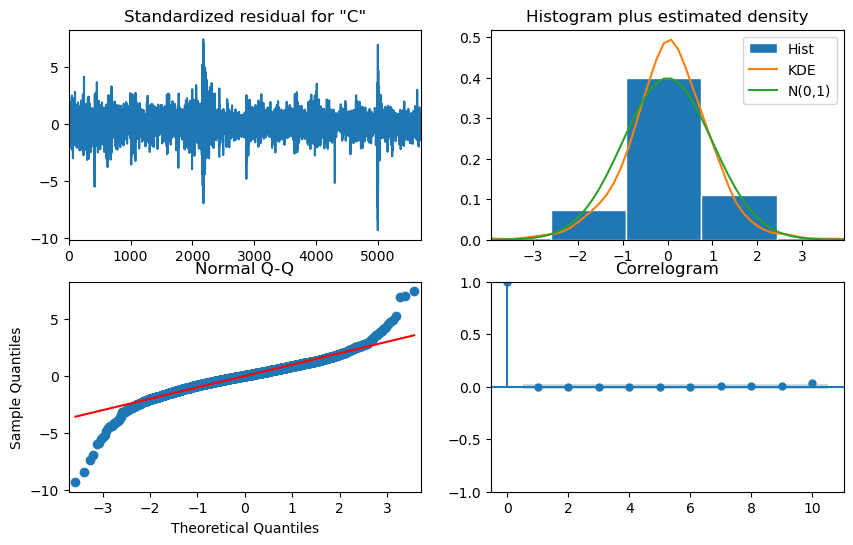

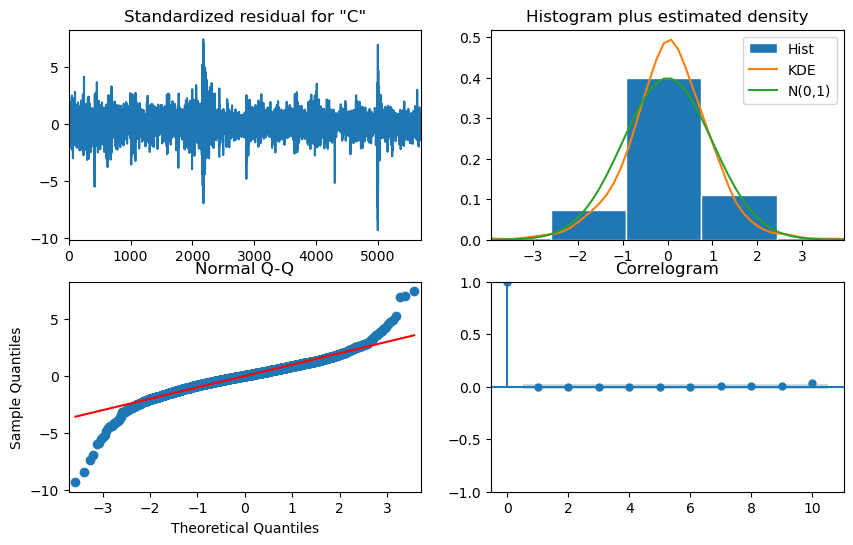

In [77]:
#===============================================================================================================================
# ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
model_fit.plot_diagnostics(figsize=(10,6))

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not constant (discrepancy to white noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => Residuals’ distribution close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => White Noise.
#
#-------------------------------------------------------------------------------------------------------------------------------

In [78]:
#===============================================================================================================================
# ARIMA: LOG - RESIDUALS - Ljung-Box test (10 lags)
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))    
#print(pvalue)

#-------------------------------------------------------------------------------------------------------------------------------
# Ljung-Box test
#-------------------------------------------------------------------------------------------------------------------------------
#       lb_stat  lb_pvalue
# --  ---------  ---------
# 11   0.617961   0.999996
#-------------------------------------------------------------------------------------------------------------------------------
#
# pvalue > 0.05 => Residuals Not Correlated
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => MODEL can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

lb_stat  lb_pvalue
11  0.617961   0.999996

In [79]:
#===============================================================================================================================
# ARIMA: LOG - RESULTS
#===============================================================================================================================
ARIMA_pred = model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_ARIMALn'] = 0
dfln['pred_ARIMALn'] = ARIMA_pred
dfln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARIMALn.xlsx')
dfln[testini-1:]


Date      Close    CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn  \
5694 2022-12-29  109734.60  11.605820    -0.004565     0.000000     0.000000   
5695 2023-01-02  106376.02  11.574735    -0.031085    11.605820    10.729549   
5696 2023-01-03  104165.74  11.553739    -0.020997    11.574735    10.729697   
5697 2023-01-04  105334.46  11.564896     0.011157    11.553739    10.729842   
5698 2023-01-05  107641.32  11.586560     0.021664    11.564896    10.729988   
...         ...        ...        ...          ...          ...          ...   
5938 2023-12-21  132182.01  11.791935     0.010479    11.781457    10.766810   
5939 2023-12-22  132752.93  11.796245     0.004310    11.791935    10.766983   
5940 2023-12-26  133532.92  11.802103     0.005858    11.796245    10.767156   
5941 2023-12-27  134193.72  11.807040     0.004936    11.802103    10.767330   
5942 2023-12-28  134185.24  11.806977    -0.000063    11.807040    10.767505   

      pred_MALn  pred_ARLn  pred_ARMALn  pred_ARIMALn  
5694   0.000000   0.000000     0.000000           NaN  
5695  11.606036  11.605954    11.606129     11.606108  
5696  11.574359  11.575645    11.574421     11.604894  
5697  11.554679  11.554345    11.554698     11.605185  
5698  11.565731  11.564572    11.565738     11.605359  
...         ...        ...          ...           ...  
5938  11.780566  11.781677    11.780623     11.605002  
5939  11.790923  11.791645    11.790986     11.605002  
5940  11.796432  11.796126    11.796466     11.605002  
5941  11.801401  11.801941    11.801490     11.605002  
5942  11.806290  11.806903    11.806354     11.605002  

[249 rows x 10 columns]

In [80]:
#===============================================================================================================================
# ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last) ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean) ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)   ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)   ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA) ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.01083083
# 1  Mean  0.80500390  0.89722010
# 2  MA    0.00011758  0.01084329
# 3  AR    0.00011792  0.01085896
# 4  ARMA  0.00011754  0.01084139
# 5  ARIMA 0.00620595  0.07877786
#-------------------------------------------------------------------------------------------------------------------------------

Log         MSE        RMSE
0   Last  0.00011731  0.01083083
1   Mean   0.8050039   0.8972201
2     MA  0.00011758  0.01084329
3     AR  0.00011792  0.01085896
4   ARMA  0.00011754  0.01084139
5  ARIMA  0.00620595  0.07877786

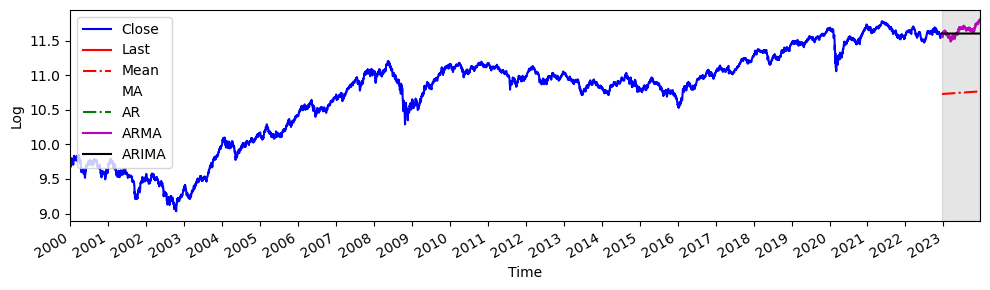

In [81]:
#===============================================================================================================================
# ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'r-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'w-' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g-.', label='AR') 
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm-' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'k-' , label='ARIMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


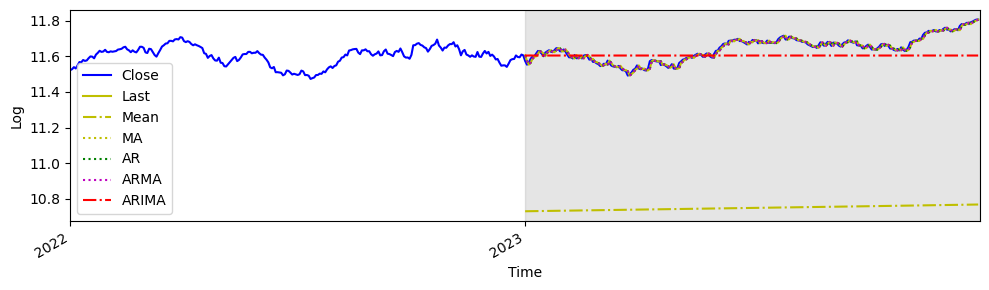

In [82]:
#===============================================================================================================================
# ARIMA: Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'y-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'y-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm:' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'r-.', label='ARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [83]:
################################################################################################################################
#
# SARIMA
#
################################################################################################################################

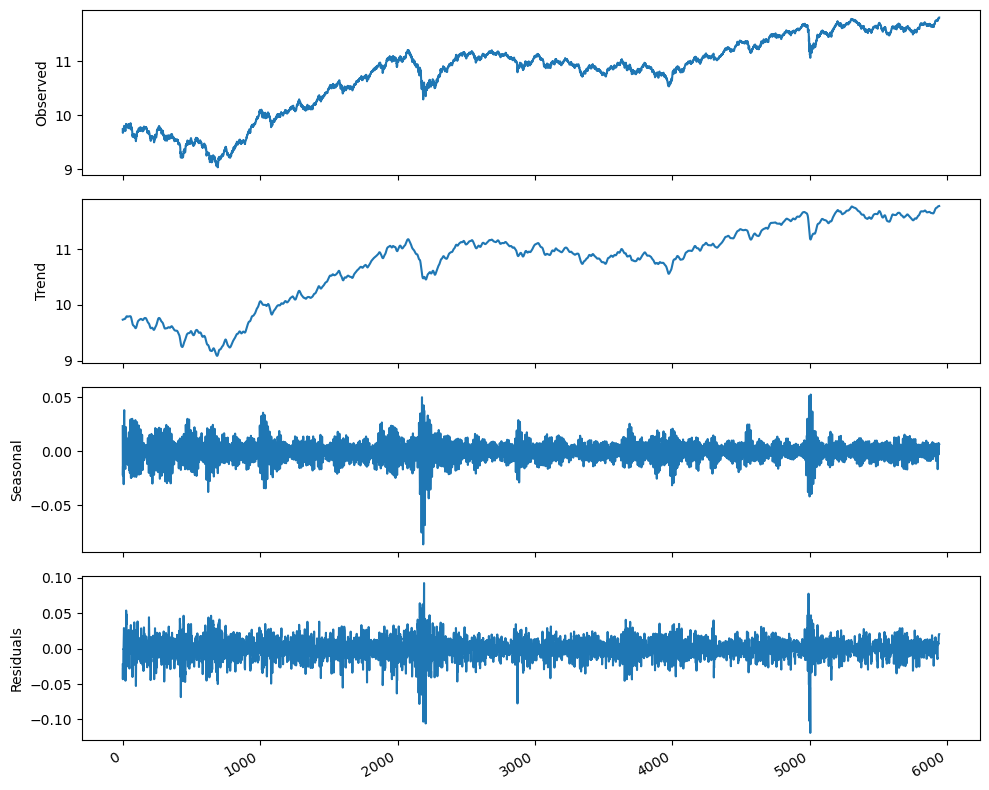

In [84]:
#===============================================================================================================================
# SARIMA: LOG - DECOMPOSITION
#===============================================================================================================================
from statsmodels.tsa.seasonal import STL
decomposition = STL(dfln['CloseLn'], period=12).fit()  

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))   
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
#plt.xticks(np.arange(0, totallen, 12), np.arange(2000, 2024, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [85]:
#===============================================================================================================================
# SARIMA: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ad_fuller_result = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ad_fuller_result[0],2)}')
print(f'ADF p-value  : {np.round(ad_fuller_result[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -1.0
ADF p-value  : 0.75


In [86]:
#===============================================================================================================================
# SARIMA: FUNCTION - optimize_SARIMA
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:   
    
    results = []
    
    for order in tqdm_notebook(order_list):   
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 


In [87]:
#===============================================================================================================================
# SARIMA: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
from itertools import product

ps = range(0, 11, 1)   
qs = range(0, 11, 1)   

#ps = range(0, 7, 1)
#qs = range(0, 8, 1)
Ps = [0]
Qs = [0]
d = 1
D = 0
s = 21

order_list = list(product(ps, qs, Ps, Qs))
len(order_list)

121

In [88]:
#===============================================================================================================================
# SARIMA: LOG - AIC - optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 121/121 [09:37<00:00, 15.69s/it]
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------
#           (p,q)            AIC
#-------------------------------
# 0  (6, 0, 0, 0)  -29721.251056
# 1  (0,10, 0, 0)  -29720.501491
# 2  (0, 6, 0, 0)  -29720.113831
# 3  (7, 0, 0, 0)  -29719.570317
# 4  (6, 1, 0, 0)  -29719.206557
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_17352\3843987759.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/121 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\states

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packa

(p,q,P,Q)           AIC
0     (6, 0, 0, 0) -29721.251056
1    (0, 10, 0, 0) -29720.501491
2     (0, 6, 0, 0) -29720.113831
3     (7, 0, 0, 0) -29719.570317
4     (6, 1, 0, 0) -29719.206557
..             ...           ...
116   (8, 7, 0, 0) -29703.464989
117   (8, 8, 0, 0) -29701.505907
118   (9, 8, 0, 0) -29699.596650
119   (2, 7, 0, 0) -29694.005694
120   (7, 8, 0, 0) -29686.821471

[121 rows x 2 columns]

In [89]:
#===============================================================================================================================
# SARIMA: LOG - FORECAST
#===============================================================================================================================
ARIMA_model = SARIMAX(trainln, order=(6,1,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

In [90]:
#===============================================================================================================================
# SARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5695
Model:               SARIMAX(6, 1, 0)   Log Likelihood               14867.626
Date:                Mon, 06 May 2024   AIC                         -29721.251
Time:                        09:45:52   BIC                         -29674.721
Sample:                             0   HQIC                        -29705.050
                               - 5695                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.008     -3.747      0.000      -0.043      -0.013
ar.L2         -0.0031      0.006     -0.489      0.625      -0.015       0.009
ar.L3         -0.0284      0.007     -3.810      0.0

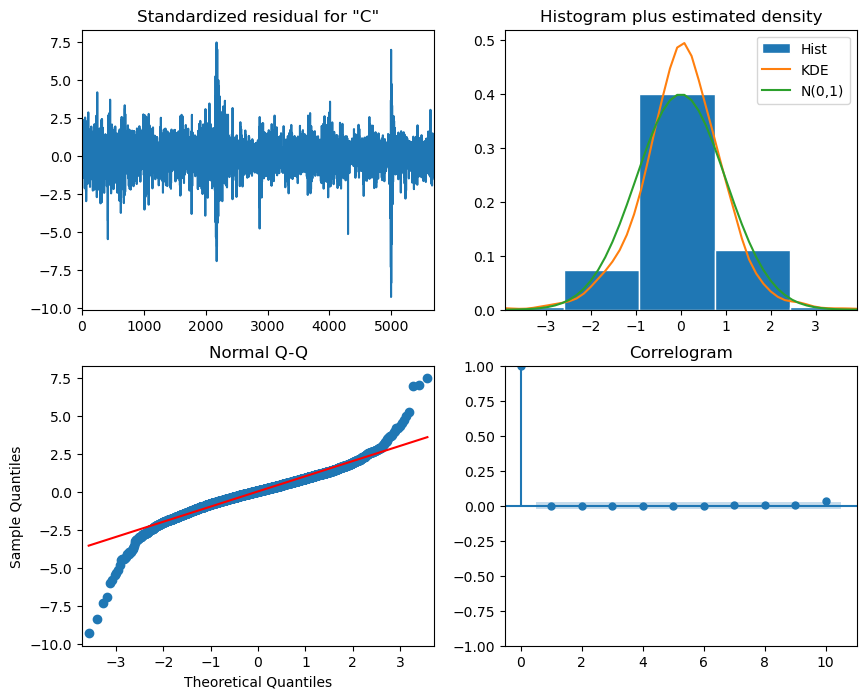

In [91]:
#===============================================================================================================================
# SARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [92]:
#===============================================================================================================================
# SARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = ARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#
#--------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   1.313341   0.999802
#
#-------------------------------------------------------------------------------------------------------------------------------
#
# LJUNG-BOX test: pvalue > 0.05 => Residuals are Not Correlated.
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => model can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

lb_stat  lb_pvalue
11  0.617961   0.999996

In [93]:
#===============================================================================================================================
# SARIMA: LOG - RESULTS
#===============================================================================================================================
SARIMA_pred = ARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMALn'] = SARIMA_pred  
dfln.loc[testini:,'pred_SARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-SARIMALn.xlsx')
dfln.loc[testini:, ['Date','CloseLn', 'pred_ARIMALn', 'pred_SARIMALn']]
#dfln.loc[testini-1:]

Date    CloseLn  pred_ARIMALn  pred_SARIMALn
5695 2023-01-02  11.574735     11.606108      11.606108
5696 2023-01-03  11.553739     11.604894      11.604894
5697 2023-01-04  11.564896     11.605185      11.605185
5698 2023-01-05  11.586560     11.605359      11.605359
5699 2023-01-06  11.598770     11.604772      11.604772
...         ...        ...           ...            ...
5938 2023-12-21  11.791935     11.605002      11.605002
5939 2023-12-22  11.796245     11.605002      11.605002
5940 2023-12-26  11.802103     11.605002      11.605002
5941 2023-12-27  11.807040     11.605002      11.605002
5942 2023-12-28  11.806977     11.605002      11.605002

[248 rows x 4 columns]

In [94]:
#===============================================================================================================================
# SARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'  ])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'  ])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'    ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'    ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'  ])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
mse_SARIMA = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last)  ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean)  ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)    ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)    ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA)  ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA) ,8))] ,
                ['SARIMA', "{:,}".format(round(mse_SARIMA,8)) , "{:,}".format(round(sqrt(mse_SARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.01083083
# 1  Mean  0.80500390  0.89722010
# 2  MA    0.00011758  0.01084329
# 3  AR    0.00011792  0.01085896
# 4  ARMA  0.00011754  0.01084139
# 5  ARIMA 0.00620595  0.07877786
# 6 SARIMA 0.01142979  0.10691020
#-------------------------------------------------------------------------------------------------------------------------------


Log         MSE        RMSE
0    Last  0.00011731  0.01083083
1    Mean   0.8050039   0.8972201
2      MA  0.00011758  0.01084329
3      AR  0.00011792  0.01085896
4    ARMA  0.00011754  0.01084139
5   ARIMA  0.00620595  0.07877786
6  SARIMA  0.00620595  0.07877786

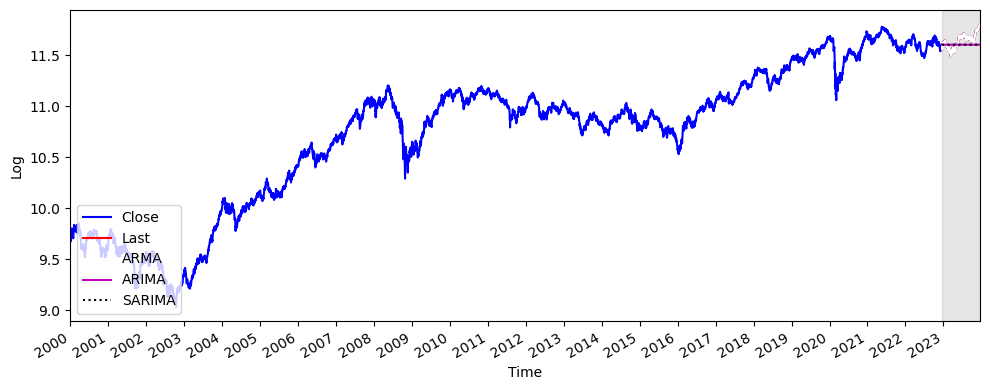

In [95]:
#===============================================================================================================================
# SARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']             , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']  , 'r-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']  , 'w-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn'] , 'm-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn'], 'k:', label='SARIMA')   
ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

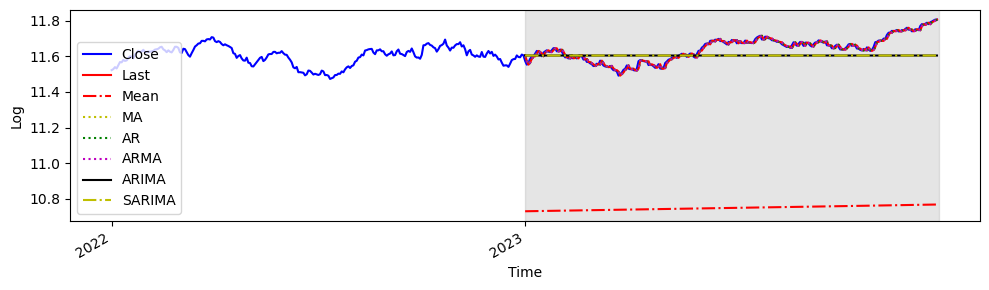

In [96]:
#===============================================================================================================================
# SARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close' )
ax.plot(dfln.loc[testini:,'pred_LastLn']     , 'r-' , label='Last'  )
ax.plot(dfln.loc[testini:,'pred_MeanLn']     , 'r-.', label='Mean'  )
ax.plot(dfln.loc[testini:,'pred_MALn']       , 'y:' , label='MA'    )
ax.plot(dfln.loc[testini:,'pred_ARLn']       , 'g:' , label='AR'    )
ax.plot(dfln.loc[testini:,'pred_ARMALn']     , 'm:' , label='ARMA'  )
ax.plot(dfln.loc[testini:,'pred_ARIMALn']    , 'k-' , label='ARIMA' )
ax.plot(dfln.loc[testini:,'pred_SARIMALn']   , 'y-.', label='SARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [97]:
################################################################################################################################
#
# SARIMA SEASONAL
#
################################################################################################################################


In [98]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -1.0
ADF p-value  : 0.75


In [99]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS [0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS [1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -16.89
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -16.89
ADF p-value  : 0.0


In [100]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF-SEASONAL - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal = dfln['CloseLn'].diff(periods=12)
ADF_SARIMAS = adfuller(dflndiffseasonal[12:])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -12.9
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal

ADF Statistic: -12.9
ADF p-value  : 0.0


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5938    0.040755
5939    0.055207
5940    0.057990
5941    0.054361
5942    0.055693
Name: CloseLn, Length: 5943, dtype: float64

In [101]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - TRAIN SET
#===============================================================================================================================
trainln

0        9.736867
1        9.670988
2        9.695549
3        9.687002
4        9.699482
          ...    
5690    11.605482
5691    11.596694
5692    11.595226
5693    11.610385
5694    11.605820
Name: CloseLn, Length: 5695, dtype: float64

In [102]:
#===============================================================================================================================
# SARIMA SEASONAL: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
ps = range(0, 4, 1)    
qs = range(0, 3, 1)
Ps = range(0, 2, 1)
Qs = range(0, 2, 1)

d = 1
D = 1
s = 21
order_list = list(product(ps, qs, Ps, Qs))
print(len(order_list))

48


In [103]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - AIC optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 4, 1)    
# qs = range(0, 3, 1)
# Ps = range(0, 2, 1)
# Qs = range(0, 2, 1)
# 
# d = 1
# D = 1
# s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 48/48 [36:39<00:00, 111.83s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------
# 0  (1, 0, 0, 1)  -29487.796828
# 1  (0, 1, 0, 1)  -29487.786588
# 2  (3, 0, 0, 1)  -29487.561233
# 3  (0, 1, 1, 1)  -29486.441326
# 4  (1, 0, 1, 1)  -29486.419302
# 5  (3, 0, 1, 1)  -29486.236129
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_17352\3843987759.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/48 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q,P,Q)           AIC
0   (1, 0, 0, 1) -29487.796828
1   (0, 1, 0, 1) -29487.786588
2   (3, 0, 0, 1) -29487.561233
3   (0, 1, 1, 1) -29486.441326
4   (1, 0, 1, 1) -29486.419302
5   (3, 0, 1, 1) -29486.236129
6   (3, 1, 0, 1) -29485.850961
7   (2, 0, 0, 1) -29485.837257
8   (0, 2, 0, 1) -29485.559907
9   (0, 2, 1, 1) -29484.494606
10  (2, 0, 1, 1) -29484.410386
11  (2, 2, 0, 1) -29484.391887
12  (1, 2, 0, 1) -29484.188357
13  (1, 1, 0, 1) -29484.141816
14  (3, 1, 1, 1) -29484.111032
15  (0, 0, 0, 1) -29484.024309
16  (2, 1, 0, 1) -29483.805347
17  (2, 2, 1, 1) -29483.506981
18  (0, 0, 1, 1) -29483.487587
19  (1, 1, 1, 1) -29482.857055
20  (3, 2, 0, 1) -29482.782545
21  (1, 2, 1, 1) -29482.633017
22  (3, 2, 1, 1) -29482.292641
23  (2, 1, 1, 1) -29482.114091
24  (1, 0, 1, 0) -27239.513908
25  (0, 1, 1, 0) -27239.487812
26  (0, 0, 1, 0) -27238.222775
27  (2, 0, 1, 0) -27237.605343
28  (0, 2, 1, 0) -27237.571044
29  (3, 0, 1, 0) -27237.200594
30  (1, 1, 1, 0) -27237.012884
31  (2, 1, 1, 0) -27235.598783
32  (1, 2, 1, 0) -27235.491749
33  (3, 1, 1, 0) -27235.249737
34  (2, 2, 1, 0) -27233.591132
35  (3, 2, 1, 0) -27233.251611
36  (1, 0, 0, 0) -25621.792433
37  (1, 1, 0, 0) -25621.737195
38  (0, 1, 0, 0) -25621.560129
39  (2, 0, 0, 0) -25621.154060
40  (0, 2, 0, 0) -25620.945434
41  (3, 0, 0, 0) -25620.907504
42  (2, 1, 0, 0) -25619.102474
43  (3, 1, 0, 0) -25618.947627
44  (1, 2, 0, 0) -25618.397771
45  (2, 2, 0, 0) -25617.051118
46  (3, 2, 0, 0) -25616.920256
47  (0, 0, 0, 0) -25616.098787

In [105]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================

SARIMA_model = SARIMAX(trainln, order=(0,1,2), seasonal_order=(1,1,1,21), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

# Process time: 2" 

In [106]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              CloseLn   No. Observations:                 5695
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 21)   Log Likelihood               14747.247
Date:                              Mon, 06 May 2024   AIC                         -29484.495
Time:                                      10:27:01   BIC                         -29451.277
Sample:                                           0   HQIC                        -29472.927
                                             - 5695                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0294      0.007     -4.021      0.000      -0.044      -0.015
ma.L2         -0.00

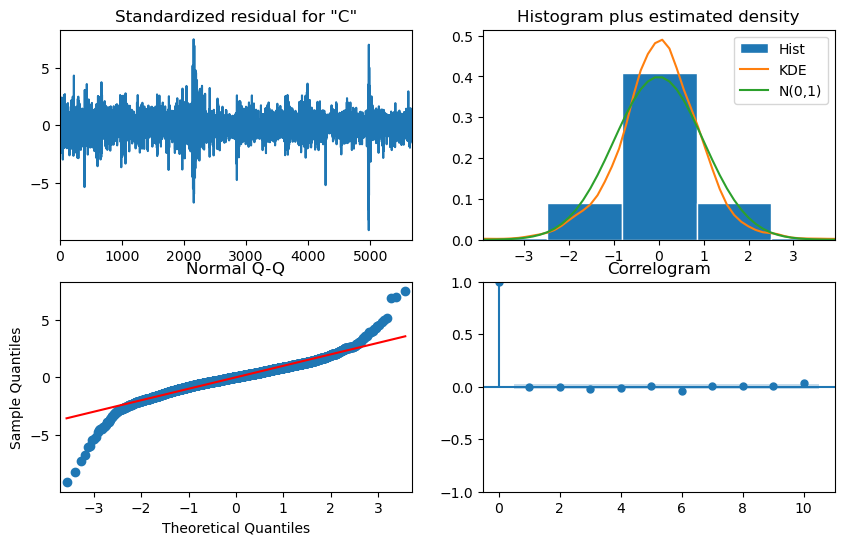

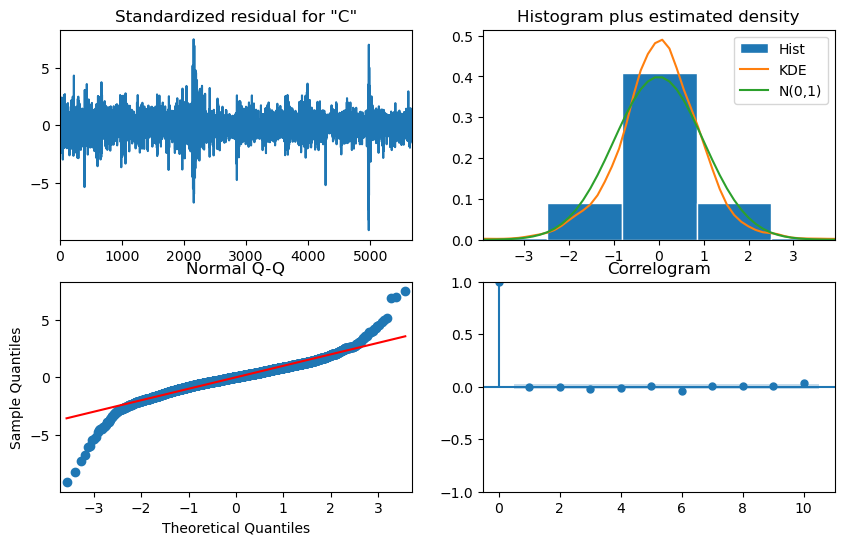

In [107]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_model_fit.plot_diagnostics(figsize=(10,6))


In [108]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = SARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[20], return_df=True)

#-------------------------------------------------------------------------------------------------------------------------------
#      lb_stat  lb_pvalue
#------------------------
# 20  1.535884        1.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# p-values > 0.78 => Null Hypothesis Not Rejected => Residuals Independent, Residuals Not Correlated
#-------------------------------------------------------------------------------------------------------------------------------
# ****** WHITE NOISE RESIDUALS ******
#-------------------------------------------------------------------------------------------------------------------------------

lb_stat  lb_pvalue
20  1.535884        1.0

In [109]:
SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean

5695    11.605665
5696    11.604714
5697    11.606888
5698    11.608003
5699    11.607930
          ...    
5939    11.687099
5940    11.688017
5941    11.686567
5942    11.686758
5943    11.687397
Name: predicted_mean, Length: 249, dtype: float64

In [110]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
SARIMAS_pred = SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMASLn'] = SARIMAS_pred
dfln.loc[testini:,'pred_SARIMASLn'].to_excel('Data/Output/Rolling-Ln-Daily-SARIMASLn.xlsx')
dfln.loc[testini-1:, ['Date', 'CloseLn', 'pred_ARIMALn', 'pred_SARIMALn' , 'pred_SARIMASLn']]


Date    CloseLn  pred_ARIMALn  pred_SARIMALn  pred_SARIMASLn
5694 2022-12-29  11.605820           NaN            NaN             NaN
5695 2023-01-02  11.574735     11.606108      11.606108       11.605665
5696 2023-01-03  11.553739     11.604894      11.604894       11.604714
5697 2023-01-04  11.564896     11.605185      11.605185       11.606888
5698 2023-01-05  11.586560     11.605359      11.605359       11.608003
...         ...        ...           ...            ...             ...
5938 2023-12-21  11.791935     11.605002      11.605002       11.687828
5939 2023-12-22  11.796245     11.605002      11.605002       11.687099
5940 2023-12-26  11.802103     11.605002      11.605002       11.688017
5941 2023-12-27  11.807040     11.605002      11.605002       11.686567
5942 2023-12-28  11.806977     11.605002      11.605002       11.686758

[249 rows x 5 columns]

In [112]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'    ])
mse_Mean     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'    ])
mse_MA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'      ])
mse_AR       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'      ])
mse_ARMA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'    ])
mse_ARIMA    = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'   ])
mse_SARIMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'  ])
mse_SARIMAS  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn' ])

data_metrics = [['Last'    , "{:,}".format(round(mse_Last  ,6))  , "{:,}".format(round(sqrt(mse_Last)    ,6))] ,
                ['Mean'    , "{:,}".format(round(mse_Mean  ,6))  , "{:,}".format(round(sqrt(mse_Mean)    ,6))] ,
                ['MA'      , "{:,}".format(round(mse_MA    ,6))  , "{:,}".format(round(sqrt(mse_MA)      ,6))] ,
                ['AR'      , "{:,}".format(round(mse_AR    ,6))  , "{:,}".format(round(sqrt(mse_AR)      ,6))] ,
                ['ARMA'    , "{:,}".format(round(mse_ARMA  ,6))  , "{:,}".format(round(sqrt(mse_ARMA)    ,6))] ,
                ['ARIMA'   , "{:,}".format(round(mse_ARIMA ,6))  , "{:,}".format(round(sqrt(mse_ARIMA)   ,6))] ,
                ['SARIMA'  , "{:,}".format(round(mse_SARIMA,6))  , "{:,}".format(round(sqrt(mse_SARIMA)  ,6))] ,
                ['SARIMAS' , "{:,}".format(round(mse_SARIMAS,6)) , "{:,}".format(round(sqrt(mse_SARIMAS),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])

#row_new = {'Model':'ARIMA', 'MSE':round(mse_ARIMA,4), 'RMSE':round(sqrt(mse_ARIMA),4) }
#data_metrics = data_metrics.append(row_new, ignore_index=True)

df_metrics
#-------------------------------------------------------------------------------------------------------------------------------
#  Model         MSE      RMSE
#-------------------------------------------------------------------------------------------------------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.011430  0.106910
# 7  SARIMAS  0.002782  0.052747
#-------------------------------------------------------------------------------------------------------------------------------

Model       MSE      RMSE
0     Last  0.000117  0.010831
1     Mean  0.805004   0.89722
2       MA  0.000118  0.010843
3       AR  0.000118  0.010859
4     ARMA  0.000118  0.010841
5    ARIMA  0.006206  0.078778
6   SARIMA  0.006206  0.078778
7  SARIMAS  0.002782  0.052747

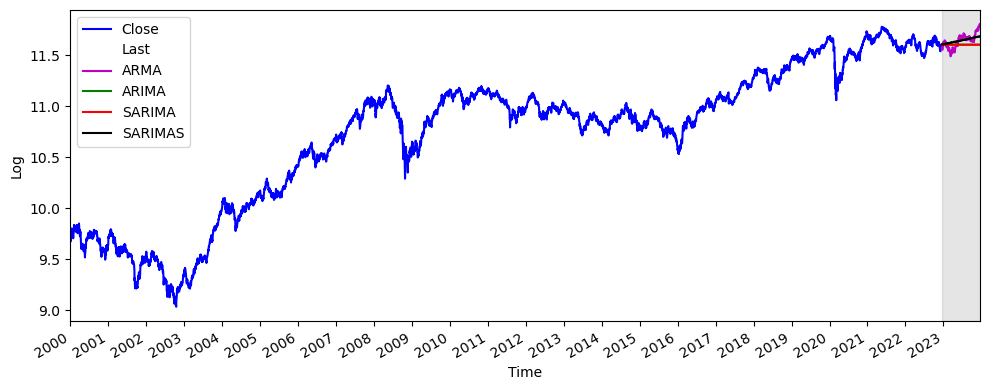

In [113]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[ :      ,'CloseLn']        , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn']  , 'r-', label='SARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'k-', label='SARIMAS')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

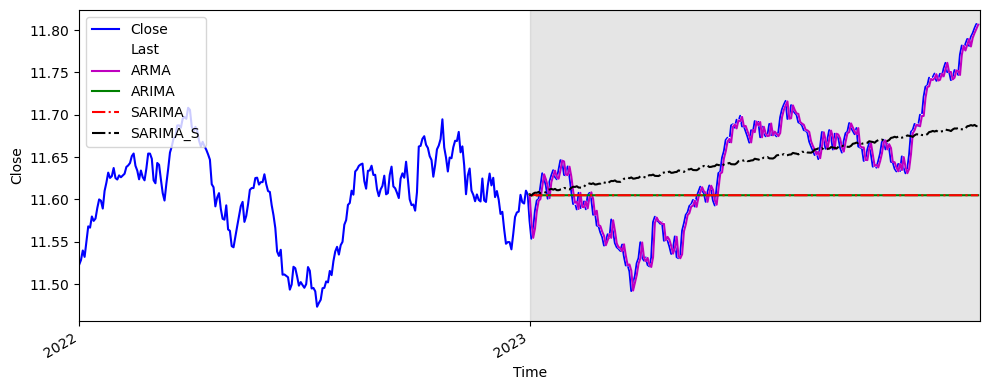

In [115]:
#===============================================================================================================================
# SARIMA SEASONAL: PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']  , 'b-', label='Close')    
ax.plot(dfln.loc[testini:  ,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:  ,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:  ,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMALn']  , 'r-.', label='SARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMASLn'] , 'k-.', label='SARIMA_S')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [116]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA
#
################################################################################################################################
################################################################################################################################


In [117]:
#===============================================================================================================================
# ROLLING ARIMA: LIBRARIES
#===============================================================================================================================
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

#===============================================================================================================================
# ROLLING ARIMA: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[0:trainlen], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

In [118]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,   # max guess for MA(q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# AIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
# Total fit time: 8.761 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31166.880, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31169.576, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31169.602, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31166.880, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31168.050, Time=2.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31167.687, Time=1.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31166.833, Time=3.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31169.602, Time=0.66 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 11.134 seconds


In [119]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,    # max guess for MA(q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# BIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
# Total fit time: 3.963 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-31153.500, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-31149.506, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-31149.532, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-31153.500, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-31141.291, Time=2.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.411 seconds


In [120]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    
    ARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), simple_differencing=False)
    ARIMA_ROLL_model_fit = ARIMA_ROLL_model.fit(disp=False)

    output = ARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[trainlen+t,'pred_ARIMARLn'] = yhat
    

t = 0, Estimation = 11.605938, Observed = 11.574735
t = 1, Estimation = 11.575623, Observed = 11.553739
t = 2, Estimation = 11.554352, Observed = 11.564896
t = 3, Estimation = 11.564599, Observed = 11.586560
t = 4, Estimation = 11.585944, Observed = 11.598770


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 5, Estimation = 11.598412, Observed = 11.600291
t = 6, Estimation = 11.600239, Observed = 11.615633


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 7, Estimation = 11.615204, Observed = 11.630860
t = 8, Estimation = 11.630426, Observed = 11.624916


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 9, Estimation = 11.625069, Observed = 11.616529
t = 10, Estimation = 11.616766, Observed = 11.601052
t = 11, Estimation = 11.601487, Observed = 11.621234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 12, Estimation = 11.620684, Observed = 11.628291
t = 13, Estimation = 11.628080, Observed = 11.634452
t = 14, Estimation = 11.634275, Observed = 11.626617
t = 15, Estimation = 11.626830, Observed = 11.623906
t = 16, Estimation = 11.623987, Observed = 11.635392
t = 17, Estimation = 11.635075, Observed = 11.646320


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 18, Estimation = 11.646008, Observed = 11.645510
t = 19, Estimation = 11.645524, Observed = 11.629073
t = 20, Estimation = 11.629529, Observed = 11.628689
t = 21, Estimation = 11.628712, Observed = 11.638946
t = 22, Estimation = 11.638662, Observed = 11.626911
t = 23, Estimation = 11.627237, Observed = 11.609513


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 24, Estimation = 11.610004, Observed = 11.594722
t = 25, Estimation = 11.595142, Observed = 11.596546
t = 26, Estimation = 11.596507, Observed = 11.588309
t = 27, Estimation = 11.588534, Observed = 11.607795
t = 28, Estimation = 11.607263, Observed = 11.589961
t = 29, Estimation = 11.590442, Observed = 11.590611
t = 30, Estimation = 11.590606, Observed = 11.597602


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 31, Estimation = 11.597407, Observed = 11.588486


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 32, Estimation = 11.588734, Observed = 11.604594
t = 33, Estimation = 11.604151, Observed = 11.607703
t = 34, Estimation = 11.607604, Observed = 11.600725
t = 35, Estimation = 11.600917, Observed = 11.582004
t = 36, Estimation = 11.582531, Observed = 11.586110
t = 37, Estimation = 11.586010, Observed = 11.569291
t = 38, Estimation = 11.569757, Observed = 11.568465
t = 39, Estimation = 11.568501, Observed = 11.561067
t = 40, Estimation = 11.561274, Observed = 11.555838
t = 41, Estimation = 11.555990, Observed = 11.545641
t = 42, Estimation = 11.545928, Observed = 11.550857


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 43, Estimation = 11.550720, Observed = 11.558857
t = 44, Estimation = 11.558631, Observed = 11.554335
t = 45, Estimation = 11.554455, Observed = 11.576279
t = 46, Estimation = 11.575670, Observed = 11.562393
t = 47, Estimation = 11.562766, Observed = 11.548468
t = 48, Estimation = 11.548868, Observed = 11.543662
t = 49, Estimation = 11.543807, Observed = 11.541828


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 50, Estimation = 11.541883, Observed = 11.539328


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 51, Estimation = 11.539400, Observed = 11.546695
t = 52, Estimation = 11.546492, Observed = 11.532547
t = 53, Estimation = 11.532937, Observed = 11.522112
t = 54, Estimation = 11.522414, Observed = 11.522857
t = 55, Estimation = 11.522845, Observed = 11.515129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 56, Estimation = 11.515345, Observed = 11.491971
t = 57, Estimation = 11.492621, Observed = 11.501149
t = 58, Estimation = 11.500911, Observed = 11.509625
t = 59, Estimation = 11.509382, Observed = 11.524707
t = 60, Estimation = 11.524281, Observed = 11.530692
t = 61, Estimation = 11.530514, Observed = 11.549387
t = 62, Estimation = 11.548865, Observed = 11.531573
t = 63, Estimation = 11.532054, Observed = 11.527875
t = 64, Estimation = 11.527991, Observed = 11.531447
t = 65, Estimation = 11.531351, Observed = 11.522656
t = 66, Estimation = 11.522898, Observed = 11.521109
t = 67, Estimation = 11.521159, Observed = 11.531223
t = 68, Estimation = 11.530943, Observed = 11.573209
t = 69, Estimation = 11.572042, Observed = 11.579553
t = 70, Estimation = 11.579347, Observed = 11.575504
t = 71, Estimation = 11.575610, Observed = 11.573826
t = 72, Estimation = 11.573875, Observed = 11.571342
t = 73, Estimation = 11.571412, Observed = 11.572733
t = 74, Estimation = 11.572697, Observed = 11.

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 76, Estimation = 11.555563, Observed = 11.551632


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 77, Estimation = 11.551741, Observed = 11.544619
t = 78, Estimation = 11.544815, Observed = 11.535783
t = 79, Estimation = 11.536031, Observed = 11.541739
t = 80, Estimation = 11.541583, Observed = 11.556288
t = 81, Estimation = 11.555884, Observed = 11.532012
t = 82, Estimation = 11.532671, Observed = 11.530737
t = 83, Estimation = 11.530790, Observed = 11.534436
t = 84, Estimation = 11.534335, Observed = 11.563129
t = 85, Estimation = 11.562335, Observed = 11.571592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 86, Estimation = 11.571338, Observed = 11.581646
t = 87, Estimation = 11.581364, Observed = 11.584764
t = 88, Estimation = 11.584671, Observed = 11.592258
t = 89, Estimation = 11.592051, Observed = 11.594172
t = 90, Estimation = 11.594114, Observed = 11.599370
t = 91, Estimation = 11.599227, Observed = 11.591678


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 92, Estimation = 11.591885, Observed = 11.603314
t = 93, Estimation = 11.603001, Observed = 11.609221


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 94, Estimation = 11.609051, Observed = 11.614981
t = 95, Estimation = 11.614819, Observed = 11.610171
t = 96, Estimation = 11.610298, Observed = 11.607586
t = 97, Estimation = 11.607660, Observed = 11.597262
t = 98, Estimation = 11.597546, Observed = 11.608730
t = 99, Estimation = 11.608424, Observed = 11.616434
t = 100, Estimation = 11.616215, Observed = 11.611262
t = 101, Estimation = 11.611397, Observed = 11.598801
t = 102, Estimation = 11.599145, Observed = 11.592984
t = 103, Estimation = 11.593152, Observed = 11.613356
t = 104, Estimation = 11.612803, Observed = 11.631225
t = 105, Estimation = 11.630725, Observed = 11.632452
t = 106, Estimation = 11.632405, Observed = 11.649291
t = 107, Estimation = 11.648834, Observed = 11.656923
t = 108, Estimation = 11.656705, Observed = 11.670096
t = 109, Estimation = 11.669735, Observed = 11.672800


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 110, Estimation = 11.672717, Observed = 11.667728
t = 111, Estimation = 11.667862, Observed = 11.687457
t = 112, Estimation = 11.686927, Observed = 11.688734
t = 113, Estimation = 11.688685, Observed = 11.684847
t = 114, Estimation = 11.684950, Observed = 11.694061
t = 115, Estimation = 11.693815, Observed = 11.692095
t = 116, Estimation = 11.692142, Observed = 11.698743
t = 117, Estimation = 11.698565, Observed = 11.686326


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 118, Estimation = 11.686657, Observed = 11.686686


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 119, Estimation = 11.686686, Observed = 11.680497
t = 120, Estimation = 11.680664, Observed = 11.674388
t = 121, Estimation = 11.674558, Observed = 11.667202
t = 122, Estimation = 11.667400, Observed = 11.681677
t = 123, Estimation = 11.681291, Observed = 11.679177
t = 124, Estimation = 11.679234, Observed = 11.692516
t = 125, Estimation = 11.692156, Observed = 11.687520
t = 126, Estimation = 11.687646, Observed = 11.691483
t = 127, Estimation = 11.691379, Observed = 11.673561


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 128, Estimation = 11.674045, Observed = 11.686021
t = 129, Estimation = 11.685694, Observed = 11.677952
t = 130, Estimation = 11.678164, Observed = 11.674666


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 131, Estimation = 11.674762, Observed = 11.675610
t = 132, Estimation = 11.675586, Observed = 11.689094
t = 133, Estimation = 11.688725, Observed = 11.675984
t = 134, Estimation = 11.676333, Observed = 11.680298
t = 135, Estimation = 11.680189, Observed = 11.677093
t = 136, Estimation = 11.677178, Observed = 11.674637
t = 137, Estimation = 11.674706, Observed = 11.679142
t = 138, Estimation = 11.679020, Observed = 11.697052
t = 139, Estimation = 11.696557, Observed = 11.706366
t = 140, Estimation = 11.706098, Observed = 11.711840
t = 141, Estimation = 11.711683, Observed = 11.716359
t = 142, Estimation = 11.716232, Observed = 11.695161
t = 143, Estimation = 11.695736, Observed = 11.696805
t = 144, Estimation = 11.696776, Observed = 11.711309
t = 145, Estimation = 11.710912, Observed = 11.705597
t = 146, Estimation = 11.705742, Observed = 11.702378


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 147, Estimation = 11.702470, Observed = 11.700117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 148, Estimation = 11.700181, Observed = 11.691136
t = 149, Estimation = 11.691383, Observed = 11.690063
t = 150, Estimation = 11.690099, Observed = 11.687637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 151, Estimation = 11.687704, Observed = 11.681898
t = 152, Estimation = 11.682057, Observed = 11.681398
t = 153, Estimation = 11.681416, Observed = 11.678992
t = 154, Estimation = 11.679058, Observed = 11.668300


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 155, Estimation = 11.668594, Observed = 11.662822
t = 156, Estimation = 11.662980, Observed = 11.657818
t = 157, Estimation = 11.657959, Observed = 11.652533


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 158, Estimation = 11.652681, Observed = 11.656233
t = 159, Estimation = 11.656137, Observed = 11.647713
t = 160, Estimation = 11.647943, Observed = 11.662689
t = 161, Estimation = 11.662286, Observed = 11.679580
t = 162, Estimation = 11.679109, Observed = 11.670148
t = 163, Estimation = 11.670393, Observed = 11.659941
t = 164, Estimation = 11.660226, Observed = 11.670963
t = 165, Estimation = 11.670670, Observed = 11.681854
t = 166, Estimation = 11.681550, Observed = 11.674492
t = 167, Estimation = 11.674685, Observed = 11.659117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 168, Estimation = 11.659541, Observed = 11.677532
t = 169, Estimation = 11.677040, Observed = 11.676545
t = 170, Estimation = 11.676559, Observed = 11.672757
t = 171, Estimation = 11.672861, Observed = 11.661219


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 172, Estimation = 11.661538, Observed = 11.655409
t = 173, Estimation = 11.655576, Observed = 11.668932
t = 174, Estimation = 11.668566, Observed = 11.678170
t = 175, Estimation = 11.677908, Observed = 11.679930


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 176, Estimation = 11.679875, Observed = 11.690164
t = 177, Estimation = 11.689883, Observed = 11.684839


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 178, Estimation = 11.684977, Observed = 11.680879
t = 179, Estimation = 11.680991, Observed = 11.677132


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 180, Estimation = 11.677237, Observed = 11.684315


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 181, Estimation = 11.684122, Observed = 11.662595
t = 182, Estimation = 11.663185, Observed = 11.661420
t = 183, Estimation = 11.661468, Observed = 11.660695
t = 184, Estimation = 11.660716, Observed = 11.645649


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 185, Estimation = 11.646061, Observed = 11.646818
t = 186, Estimation = 11.646798, Observed = 11.659022
t = 187, Estimation = 11.658687, Observed = 11.666206


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 188, Estimation = 11.666000, Observed = 11.653182
t = 189, Estimation = 11.653533, Observed = 11.638845


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 190, Estimation = 11.639245, Observed = 11.640504
t = 191, Estimation = 11.640470, Observed = 11.637654
t = 192, Estimation = 11.637731, Observed = 11.645441
t = 193, Estimation = 11.645230, Observed = 11.654044
t = 194, Estimation = 11.653803, Observed = 11.667678
t = 195, Estimation = 11.667301, Observed = 11.670363
t = 196, Estimation = 11.670280, Observed = 11.659223
t = 197, Estimation = 11.659524, Observed = 11.665937
t = 198, Estimation = 11.665763, Observed = 11.660556
t = 199, Estimation = 11.660698, Observed = 11.644477
t = 200, Estimation = 11.644918, Observed = 11.643991
t = 201, Estimation = 11.644017, Observed = 11.636516
t = 202, Estimation = 11.636720, Observed = 11.633234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 203, Estimation = 11.633329, Observed = 11.641863
t = 204, Estimation = 11.641631, Observed = 11.633637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 205, Estimation = 11.633855, Observed = 11.650745
t = 206, Estimation = 11.650284, Observed = 11.637806


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 207, Estimation = 11.638148, Observed = 11.630989
t = 208, Estimation = 11.631184, Observed = 11.636414
t = 209, Estimation = 11.636271, Observed = 11.653148


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 210, Estimation = 11.652687, Observed = 11.679795


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 211, Estimation = 11.679061, Observed = 11.682088
t = 212, Estimation = 11.682006, Observed = 11.689129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 213, Estimation = 11.688936, Observed = 11.688362


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 214, Estimation = 11.688378, Observed = 11.687166
t = 215, Estimation = 11.687198, Observed = 11.699970
t = 216, Estimation = 11.699625, Observed = 11.698659
t = 217, Estimation = 11.698685, Observed = 11.721286
t = 218, Estimation = 11.720675, Observed = 11.733179
t = 219, Estimation = 11.732843, Observed = 11.734253
t = 220, Estimation = 11.734215, Observed = 11.743696
t = 221, Estimation = 11.743442, Observed = 11.741065
t = 222, Estimation = 11.741129, Observed = 11.744317
t = 223, Estimation = 11.744232, Observed = 11.748596
t = 224, Estimation = 11.748479, Observed = 11.740199
t = 225, Estimation = 11.740421, Observed = 11.741904
t = 226, Estimation = 11.741864, Observed = 11.748300
t = 227, Estimation = 11.748127, Observed = 11.745351
t = 228, Estimation = 11.745426, Observed = 11.754546
t = 229, Estimation = 11.754301, Observed = 11.761229
t = 230, Estimation = 11.761043, Observed = 11.750388
t = 231, Estimation = 11.750675, Observed = 11.751180
t = 232, Estimation = 11.751

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 235, Estimation = 11.752446, Observed = 11.751284
t = 236, Estimation = 11.751315, Observed = 11.747231
t = 237, Estimation = 11.747341, Observed = 11.771166


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 238, Estimation = 11.770523, Observed = 11.781746


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 239, Estimation = 11.781445, Observed = 11.776805
t = 240, Estimation = 11.776929, Observed = 11.783592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 241, Estimation = 11.783413, Observed = 11.789427
t = 242, Estimation = 11.789265, Observed = 11.781457
t = 243, Estimation = 11.781667, Observed = 11.791935
t = 244, Estimation = 11.791658, Observed = 11.796245


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 245, Estimation = 11.796122, Observed = 11.802103
t = 246, Estimation = 11.801942, Observed = 11.807040
t = 247, Estimation = 11.806903, Observed = 11.806977


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESULTS
#===============================================================================================================================
#dfln.drop('pred_RARIMA', axis=1, inplace=True)
#dfln.rename(columns={"pred_RARIMALn": "pred_ARIMARLn"}, inplace=True)

dfln.loc[testini-1:,['Date','Close', 'pred_ARIMALn', 'pred_SARIMALn','pred_ARIMARLn']]


Date      Close  pred_ARIMALn  pred_SARIMALn  pred_ARIMARLn
5694 2022-12-29  109734.60           NaN            NaN            NaN
5695 2023-01-02  106376.02     11.606108      11.606108      11.605938
5696 2023-01-03  104165.74     11.604894      11.604894      11.575623
5697 2023-01-04  105334.46     11.605185      11.605185      11.554352
5698 2023-01-05  107641.32     11.605359      11.605359      11.564599
...         ...        ...           ...            ...            ...
5938 2023-12-21  132182.01     11.605002      11.605002      11.781667
5939 2023-12-22  132752.93     11.605002      11.605002      11.791658
5940 2023-12-26  133532.92     11.605002      11.605002      11.796122
5941 2023-12-27  134193.72     11.605002      11.605002      11.801942
5942 2023-12-28  134185.24     11.605002      11.605002      11.806903

[249 rows x 5 columns]

In [123]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'      ])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'      ])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'        ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'        ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'      ])
mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'     ])
mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'    ])
mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'   ])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'    ])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last     ,6)), "{:,}".format(round(sqrt(mse_Last)   ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean     ,6)), "{:,}".format(round(sqrt(mse_Mean)   ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA       ,6)), "{:,}".format(round(sqrt(mse_MA)     ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR       ,6)), "{:,}".format(round(sqrt(mse_AR)     ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA     ,6)), "{:,}".format(round(sqrt(mse_ARMA)   ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA    ,6)), "{:,}".format(round(sqrt(mse_ARIMA)  ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA   ,6)), "{:,}".format(round(sqrt(mse_SARIMA) ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS  ,6)), "{:,}".format(round(sqrt(mse_SARIMAS),6))] ,
                ['RARIMA'     , "{:,}".format(round(mse_ARIMAR   ,6)), "{:,}".format(round(sqrt(mse_ARIMAR) ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#rmse = sqrt(mean_squared_error(CloseTest, PredTest))
#print('Test RMSE: %.3f' % rmse)

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE      RMSE
#------------------------------
# 0  Last    0.000117  0.010831
# 1  Mean    0.805004  0.897220
# 2  MA      0.000118  0.010843
# 3  AR      0.000118  0.010859
# 4  ARMA    0.000118  0.010841
# 5  ARIMA   0.006206  0.078778
# 6  SARIMA  0.011430  0.106910
# 7  SARIMAS 0.002782  0.052747
# 8  RARIMA  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

Model       MSE      RMSE
0     Last  0.000117  0.010831
1     Mean  0.805004   0.89722
2       MA  0.000118  0.010843
3       AR  0.000118  0.010859
4     ARMA  0.000118  0.010841
5    ARIMA  0.006206  0.078778
6   SARIMA  0.006206  0.078778
7  SARIMAS  0.002782  0.052747
8   RARIMA  0.000118  0.010858

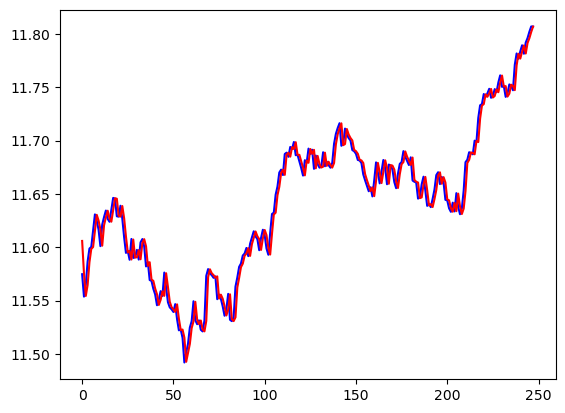

In [124]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest, color='blue')
pyplot.plot(PredTest, color='red')
pyplot.show()


In [125]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_ROLL_model_fit.summary())

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Sat, 27 Apr 2024   AIC                         -31162.874
# Time:                        21:14:18   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5942
Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
Date:                Mon, 06 May 2024   AIC                         -31162.874
Time:                        11:16:55   BIC                         -31149.495
Sample:                             0   HQIC                        -31158.226
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

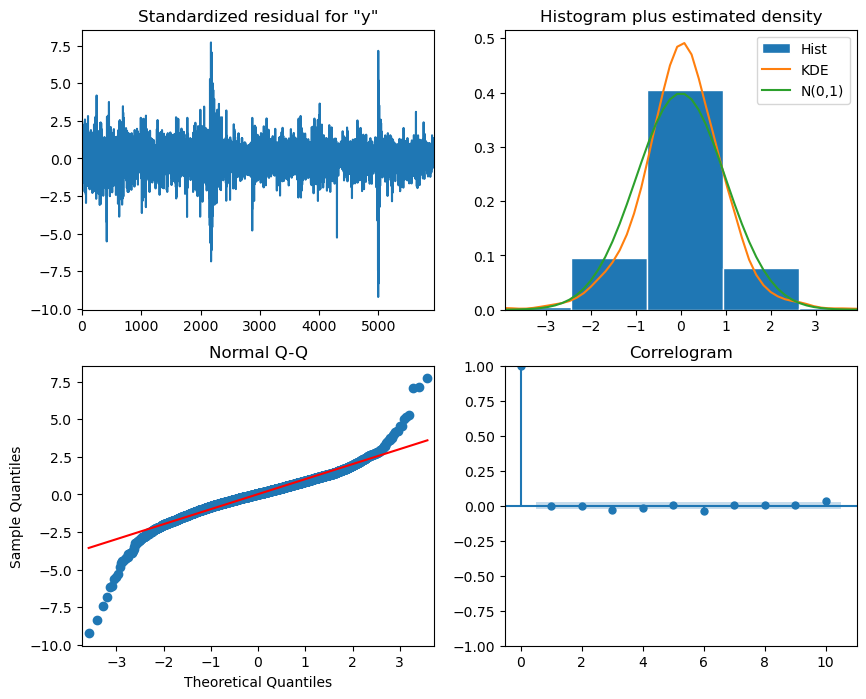

In [126]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [127]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

residuals = ARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11    0.70408   0.999992
#
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

lb_stat  lb_pvalue
11  0.67458   0.999993

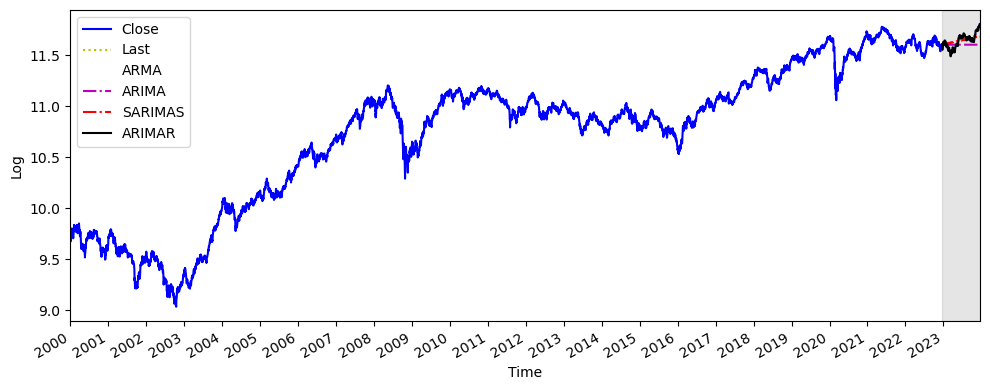

In [128]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[       :,'CloseLn']        , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA') 
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

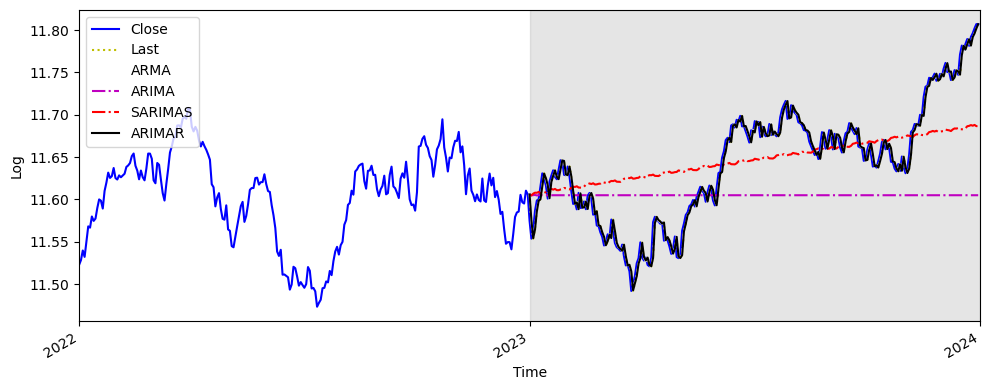

In [129]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([testini-testlen, testini, totallen ], [ 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [133]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARIMAR'] = 0.0
df.loc[testini:,'pred_ARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_ARIMARLn']),2)
df[testini-1:]

Date      Close  pred_Last  pred_Mean    pred_MA    pred_AR  \
5694 2022-12-29  109734.60       0.00       0.00       0.00       0.00   
5695 2023-01-02  106376.02  109734.60   55564.15  109758.31  109749.29   
5696 2023-01-03  104165.74  106376.02   55573.07  106335.97  106472.78   
5697 2023-01-04  105334.46  104165.74   55581.60  104263.75  104228.91   
5698 2023-01-05  107641.32  105334.46   55590.33  105422.51  105300.39   
...         ...        ...        ...        ...        ...        ...   
5938 2023-12-21  132182.01  130804.17   57947.47  130687.70  130833.02   
5939 2023-12-22  132752.93  132182.01   57959.97  132048.23  132143.63   
5940 2023-12-26  133532.92  132752.93   57972.56  132777.81  132737.09   
5941 2023-12-27  134193.72  133532.92   57985.28  133439.21  133511.27   
5942 2023-12-28  134185.24  134193.72   57998.10  134093.12  134175.40   

      pred_ARMA  pred_ARIMAR  
5694       0.00         0.00  
5695  109768.49    109747.53  
5696  106342.62    106470.44  
5697  104265.68    104229.67  
5698  105423.17    105303.17  
...         ...          ...  
5938  130695.24    130831.65  
5939  132056.66    132145.45  
5940  132782.23    132736.54  
5941  133451.11    133511.44  
5942  134101.76    134175.33  

[249 rows x 8 columns]

In [139]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'  ])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'  ])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'    ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'    ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'  ])
#mse_ARIMA  = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMA'])
#mse_SARIMAS= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAS'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)), "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model            MSE   RMSE
#--------------------------------
# 0  Last       1,476,001  1,215
# 1  Mean   3,357,125,693 57,941
# 2  MA         1,482,532  1,218
# 3  AR         1,483,149  1,218
# 4  ARMA       1,481,847  1,217
# 5  RARIMA     1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

Price            MSE    RMSE
0    Last      1,476,001   1,215
1    Mean  3,357,125,693  57,941
2      MA      1,482,532   1,218
3      AR      1,483,149   1,218
4    ARMA      1,481,847   1,217
5  ARIMAR      1,482,795   1,218

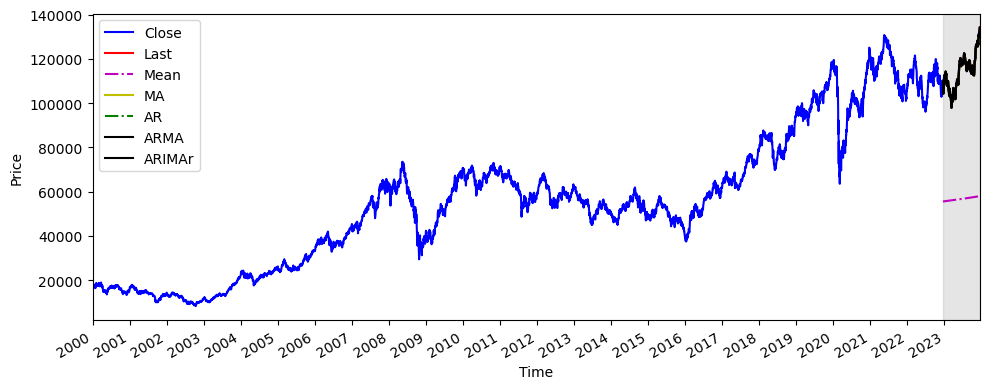

In [141]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean']   , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini:,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini:,'pred_ARMA']   , 'k-' , label='ARMA')
ax.plot(df.loc[testini:,'pred_ARIMAR'] , 'k-' , label='ARIMAr')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

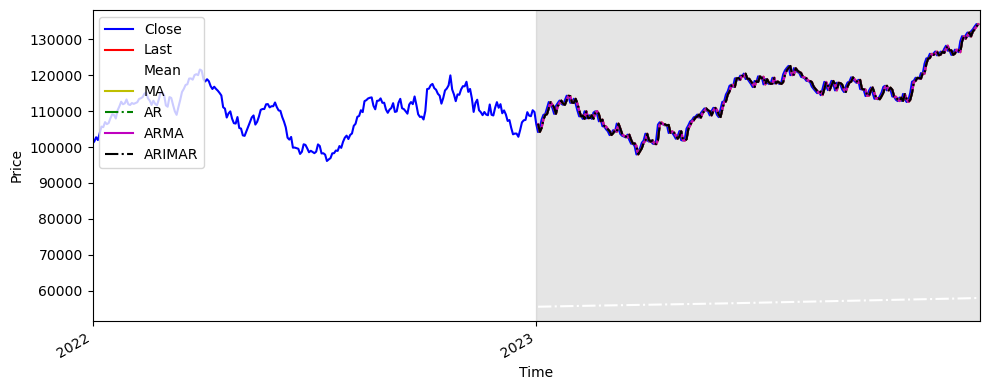

In [143]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-PERIOD:,'Close']    , 'b-' , label='Close')
ax.plot(df.loc[testini+1:  ,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini+1:  ,'pred_Mean']   , 'w-.', label='Mean')
ax.plot(df.loc[testini+1:  ,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini+1:  ,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini+1:  ,'pred_ARMA']   , 'm-' , label='ARMA')
ax.plot(df.loc[testini+1:  ,'pred_ARIMAR'] , 'k-.', label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini], [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [144]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA SEASONAL
#
################################################################################################################################
################################################################################################################################


In [145]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,    # max guess for MA(q)
                         m=21,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,21
# Best model:  ARIMA(0,1,1)(0,0,0)[21] intercept Total fit time: 53.391 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,5
# Best model:  ARIMA(0,1,1)(0,0,0) [5] intercept Total fit time: 11.277 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=-29713.902, Time=1.12 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=-29715.582, Time=5.40 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=-29715.542, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=-29713.902, Time=1.28 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=-29716.935, Time=2.58 sec
 ARIMA(1,1,0)(0,0,1)[21] intercept   : AIC=-29715.519, Time=7.26 sec
 ARIMA(1,1,0)(1,0,1)[21] intercept   : AIC=-29713.369, Time=9.78 sec
 ARIMA(2,1,0)(0,0,0)[21] intercept   : AIC=-29714.956, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=-29715.128, Time=1.75 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=-29716.954, Time=0.94 sec
 ARIMA(0,1,1)(1,0,0)[21] intercept   : AIC=-29715.607, Time=5.99 sec
 ARIMA(0,1,1)(1,0,1)[21] intercept   : AIC=-29713.397, Time=7.41 sec
 ARIMA(0,1,2)(0,0,0)[21] intercept   : AIC=-29715.000, Time=3.63 sec
 ARIMA(1,1,2)(0,0,0)[21] intercept   : AIC=-29713.878, Time=

In [146]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,   # max guess for MA(q)
                         m=21,       # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[21] Total fit time: 16.358 seconds
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[5]  Total fit time: 7.869 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : BIC=-29700.607, Time=1.00 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : BIC=-29688.994, Time=6.58 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : BIC=-29688.953, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[21]             : BIC=-29700.607, Time=1.65 sec
 ARIMA(0,1,0)(1,0,0)[21] intercept   : BIC=-29692.658, Time=2.24 sec
 ARIMA(0,1,0)(0,0,1)[21] intercept   : BIC=-29692.578, Time=1.96 sec
 ARIMA(0,1,0)(1,0,1)[21] intercept   : BIC=-29683.780, Time=4.22 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : BIC=-29696.993, Time=2.54 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : BIC=-29697.012, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : BIC=-29688.539, Time=1.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[21] intercept
Total fit time: 25.421 seconds


In [147]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: OPTIMIZE_SARIMA - AIC
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 
# d = 1
# D = 1
# s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 100/100 [35:25<00:00, 41.88s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------


In [190]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[:testini], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), seasonal_order=(0,0,0,21), simple_differencing=False)
    #SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,0), seasonal_order=(0,0,0,5), simple_differencing=False)
    
    SARIMA_ROLL_model_fit = SARIMA_ROLL_model.fit(disp=False)

    output = SARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    #if t>1 : break
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[testini+t,'pred_SARIMARLn'] = yhat
    

t = 0, Estimation = 11.605938, Observed = 11.574735
t = 1, Estimation = 11.575623, Observed = 11.553739
t = 2, Estimation = 11.554352, Observed = 11.564896
t = 3, Estimation = 11.564599, Observed = 11.586560
t = 4, Estimation = 11.585944, Observed = 11.598770


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 5, Estimation = 11.598412, Observed = 11.600291
t = 6, Estimation = 11.600239, Observed = 11.615633


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 7, Estimation = 11.615204, Observed = 11.630860
t = 8, Estimation = 11.630426, Observed = 11.624916


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 9, Estimation = 11.625069, Observed = 11.616529
t = 10, Estimation = 11.616766, Observed = 11.601052
t = 11, Estimation = 11.601487, Observed = 11.621234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 12, Estimation = 11.620684, Observed = 11.628291
t = 13, Estimation = 11.628080, Observed = 11.634452
t = 14, Estimation = 11.634275, Observed = 11.626617
t = 15, Estimation = 11.626830, Observed = 11.623906
t = 16, Estimation = 11.623987, Observed = 11.635392
t = 17, Estimation = 11.635075, Observed = 11.646320


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 18, Estimation = 11.646008, Observed = 11.645510
t = 19, Estimation = 11.645524, Observed = 11.629073
t = 20, Estimation = 11.629529, Observed = 11.628689
t = 21, Estimation = 11.628712, Observed = 11.638946
t = 22, Estimation = 11.638662, Observed = 11.626911
t = 23, Estimation = 11.627237, Observed = 11.609513


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 24, Estimation = 11.610004, Observed = 11.594722
t = 25, Estimation = 11.595142, Observed = 11.596546
t = 26, Estimation = 11.596507, Observed = 11.588309
t = 27, Estimation = 11.588534, Observed = 11.607795
t = 28, Estimation = 11.607263, Observed = 11.589961
t = 29, Estimation = 11.590442, Observed = 11.590611
t = 30, Estimation = 11.590606, Observed = 11.597602


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 31, Estimation = 11.597407, Observed = 11.588486


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 32, Estimation = 11.588734, Observed = 11.604594
t = 33, Estimation = 11.604151, Observed = 11.607703
t = 34, Estimation = 11.607604, Observed = 11.600725
t = 35, Estimation = 11.600917, Observed = 11.582004
t = 36, Estimation = 11.582531, Observed = 11.586110
t = 37, Estimation = 11.586010, Observed = 11.569291
t = 38, Estimation = 11.569757, Observed = 11.568465
t = 39, Estimation = 11.568501, Observed = 11.561067
t = 40, Estimation = 11.561274, Observed = 11.555838
t = 41, Estimation = 11.555990, Observed = 11.545641
t = 42, Estimation = 11.545928, Observed = 11.550857


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 43, Estimation = 11.550720, Observed = 11.558857
t = 44, Estimation = 11.558631, Observed = 11.554335
t = 45, Estimation = 11.554455, Observed = 11.576279
t = 46, Estimation = 11.575670, Observed = 11.562393
t = 47, Estimation = 11.562766, Observed = 11.548468
t = 48, Estimation = 11.548868, Observed = 11.543662
t = 49, Estimation = 11.543807, Observed = 11.541828


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 50, Estimation = 11.541883, Observed = 11.539328


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 51, Estimation = 11.539400, Observed = 11.546695
t = 52, Estimation = 11.546492, Observed = 11.532547
t = 53, Estimation = 11.532937, Observed = 11.522112
t = 54, Estimation = 11.522414, Observed = 11.522857
t = 55, Estimation = 11.522845, Observed = 11.515129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 56, Estimation = 11.515345, Observed = 11.491971
t = 57, Estimation = 11.492621, Observed = 11.501149
t = 58, Estimation = 11.500911, Observed = 11.509625
t = 59, Estimation = 11.509382, Observed = 11.524707
t = 60, Estimation = 11.524281, Observed = 11.530692
t = 61, Estimation = 11.530514, Observed = 11.549387
t = 62, Estimation = 11.548865, Observed = 11.531573
t = 63, Estimation = 11.532054, Observed = 11.527875
t = 64, Estimation = 11.527991, Observed = 11.531447
t = 65, Estimation = 11.531351, Observed = 11.522656
t = 66, Estimation = 11.522898, Observed = 11.521109
t = 67, Estimation = 11.521159, Observed = 11.531223
t = 68, Estimation = 11.530943, Observed = 11.573209
t = 69, Estimation = 11.572042, Observed = 11.579553
t = 70, Estimation = 11.579347, Observed = 11.575504
t = 71, Estimation = 11.575610, Observed = 11.573826
t = 72, Estimation = 11.573875, Observed = 11.571342
t = 73, Estimation = 11.571412, Observed = 11.572733
t = 74, Estimation = 11.572697, Observed = 11.

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 76, Estimation = 11.555563, Observed = 11.551632


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 77, Estimation = 11.551741, Observed = 11.544619
t = 78, Estimation = 11.544815, Observed = 11.535783
t = 79, Estimation = 11.536031, Observed = 11.541739
t = 80, Estimation = 11.541583, Observed = 11.556288
t = 81, Estimation = 11.555884, Observed = 11.532012
t = 82, Estimation = 11.532671, Observed = 11.530737
t = 83, Estimation = 11.530790, Observed = 11.534436
t = 84, Estimation = 11.534335, Observed = 11.563129
t = 85, Estimation = 11.562335, Observed = 11.571592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 86, Estimation = 11.571338, Observed = 11.581646
t = 87, Estimation = 11.581364, Observed = 11.584764
t = 88, Estimation = 11.584671, Observed = 11.592258
t = 89, Estimation = 11.592051, Observed = 11.594172
t = 90, Estimation = 11.594114, Observed = 11.599370
t = 91, Estimation = 11.599227, Observed = 11.591678


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 92, Estimation = 11.591885, Observed = 11.603314
t = 93, Estimation = 11.603001, Observed = 11.609221


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 94, Estimation = 11.609051, Observed = 11.614981
t = 95, Estimation = 11.614819, Observed = 11.610171
t = 96, Estimation = 11.610298, Observed = 11.607586
t = 97, Estimation = 11.607660, Observed = 11.597262
t = 98, Estimation = 11.597546, Observed = 11.608730
t = 99, Estimation = 11.608424, Observed = 11.616434
t = 100, Estimation = 11.616215, Observed = 11.611262
t = 101, Estimation = 11.611397, Observed = 11.598801
t = 102, Estimation = 11.599145, Observed = 11.592984
t = 103, Estimation = 11.593152, Observed = 11.613356
t = 104, Estimation = 11.612803, Observed = 11.631225
t = 105, Estimation = 11.630725, Observed = 11.632452
t = 106, Estimation = 11.632405, Observed = 11.649291
t = 107, Estimation = 11.648834, Observed = 11.656923
t = 108, Estimation = 11.656705, Observed = 11.670096
t = 109, Estimation = 11.669735, Observed = 11.672800


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 110, Estimation = 11.672717, Observed = 11.667728
t = 111, Estimation = 11.667862, Observed = 11.687457
t = 112, Estimation = 11.686927, Observed = 11.688734
t = 113, Estimation = 11.688685, Observed = 11.684847
t = 114, Estimation = 11.684950, Observed = 11.694061
t = 115, Estimation = 11.693815, Observed = 11.692095
t = 116, Estimation = 11.692142, Observed = 11.698743
t = 117, Estimation = 11.698565, Observed = 11.686326


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 118, Estimation = 11.686657, Observed = 11.686686


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 119, Estimation = 11.686686, Observed = 11.680497
t = 120, Estimation = 11.680664, Observed = 11.674388
t = 121, Estimation = 11.674558, Observed = 11.667202
t = 122, Estimation = 11.667400, Observed = 11.681677
t = 123, Estimation = 11.681291, Observed = 11.679177
t = 124, Estimation = 11.679234, Observed = 11.692516
t = 125, Estimation = 11.692156, Observed = 11.687520
t = 126, Estimation = 11.687646, Observed = 11.691483
t = 127, Estimation = 11.691379, Observed = 11.673561


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 128, Estimation = 11.674045, Observed = 11.686021
t = 129, Estimation = 11.685694, Observed = 11.677952
t = 130, Estimation = 11.678164, Observed = 11.674666


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 131, Estimation = 11.674762, Observed = 11.675610
t = 132, Estimation = 11.675586, Observed = 11.689094
t = 133, Estimation = 11.688725, Observed = 11.675984
t = 134, Estimation = 11.676333, Observed = 11.680298
t = 135, Estimation = 11.680189, Observed = 11.677093
t = 136, Estimation = 11.677178, Observed = 11.674637
t = 137, Estimation = 11.674706, Observed = 11.679142
t = 138, Estimation = 11.679020, Observed = 11.697052
t = 139, Estimation = 11.696557, Observed = 11.706366
t = 140, Estimation = 11.706098, Observed = 11.711840
t = 141, Estimation = 11.711683, Observed = 11.716359
t = 142, Estimation = 11.716232, Observed = 11.695161
t = 143, Estimation = 11.695736, Observed = 11.696805
t = 144, Estimation = 11.696776, Observed = 11.711309
t = 145, Estimation = 11.710912, Observed = 11.705597
t = 146, Estimation = 11.705742, Observed = 11.702378


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 147, Estimation = 11.702470, Observed = 11.700117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 148, Estimation = 11.700181, Observed = 11.691136
t = 149, Estimation = 11.691383, Observed = 11.690063
t = 150, Estimation = 11.690099, Observed = 11.687637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 151, Estimation = 11.687704, Observed = 11.681898
t = 152, Estimation = 11.682057, Observed = 11.681398
t = 153, Estimation = 11.681416, Observed = 11.678992
t = 154, Estimation = 11.679058, Observed = 11.668300


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 155, Estimation = 11.668594, Observed = 11.662822
t = 156, Estimation = 11.662980, Observed = 11.657818
t = 157, Estimation = 11.657959, Observed = 11.652533


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 158, Estimation = 11.652681, Observed = 11.656233
t = 159, Estimation = 11.656137, Observed = 11.647713
t = 160, Estimation = 11.647943, Observed = 11.662689
t = 161, Estimation = 11.662286, Observed = 11.679580
t = 162, Estimation = 11.679109, Observed = 11.670148
t = 163, Estimation = 11.670393, Observed = 11.659941
t = 164, Estimation = 11.660226, Observed = 11.670963
t = 165, Estimation = 11.670670, Observed = 11.681854
t = 166, Estimation = 11.681550, Observed = 11.674492
t = 167, Estimation = 11.674685, Observed = 11.659117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 168, Estimation = 11.659541, Observed = 11.677532
t = 169, Estimation = 11.677040, Observed = 11.676545
t = 170, Estimation = 11.676559, Observed = 11.672757
t = 171, Estimation = 11.672861, Observed = 11.661219


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 172, Estimation = 11.661538, Observed = 11.655409
t = 173, Estimation = 11.655576, Observed = 11.668932
t = 174, Estimation = 11.668566, Observed = 11.678170
t = 175, Estimation = 11.677908, Observed = 11.679930


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 176, Estimation = 11.679875, Observed = 11.690164
t = 177, Estimation = 11.689883, Observed = 11.684839


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 178, Estimation = 11.684977, Observed = 11.680879
t = 179, Estimation = 11.680991, Observed = 11.677132


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 180, Estimation = 11.677237, Observed = 11.684315


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 181, Estimation = 11.684122, Observed = 11.662595
t = 182, Estimation = 11.663185, Observed = 11.661420
t = 183, Estimation = 11.661468, Observed = 11.660695
t = 184, Estimation = 11.660716, Observed = 11.645649


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 185, Estimation = 11.646061, Observed = 11.646818
t = 186, Estimation = 11.646798, Observed = 11.659022
t = 187, Estimation = 11.658687, Observed = 11.666206


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 188, Estimation = 11.666000, Observed = 11.653182
t = 189, Estimation = 11.653533, Observed = 11.638845


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 190, Estimation = 11.639245, Observed = 11.640504
t = 191, Estimation = 11.640470, Observed = 11.637654
t = 192, Estimation = 11.637731, Observed = 11.645441
t = 193, Estimation = 11.645230, Observed = 11.654044
t = 194, Estimation = 11.653803, Observed = 11.667678
t = 195, Estimation = 11.667301, Observed = 11.670363
t = 196, Estimation = 11.670280, Observed = 11.659223
t = 197, Estimation = 11.659524, Observed = 11.665937
t = 198, Estimation = 11.665763, Observed = 11.660556
t = 199, Estimation = 11.660698, Observed = 11.644477
t = 200, Estimation = 11.644918, Observed = 11.643991
t = 201, Estimation = 11.644017, Observed = 11.636516
t = 202, Estimation = 11.636720, Observed = 11.633234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 203, Estimation = 11.633329, Observed = 11.641863
t = 204, Estimation = 11.641631, Observed = 11.633637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 205, Estimation = 11.633855, Observed = 11.650745
t = 206, Estimation = 11.650284, Observed = 11.637806


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 207, Estimation = 11.638148, Observed = 11.630989
t = 208, Estimation = 11.631184, Observed = 11.636414
t = 209, Estimation = 11.636271, Observed = 11.653148


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 210, Estimation = 11.652687, Observed = 11.679795


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 211, Estimation = 11.679061, Observed = 11.682088
t = 212, Estimation = 11.682006, Observed = 11.689129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 213, Estimation = 11.688936, Observed = 11.688362


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 214, Estimation = 11.688378, Observed = 11.687166
t = 215, Estimation = 11.687198, Observed = 11.699970
t = 216, Estimation = 11.699625, Observed = 11.698659
t = 217, Estimation = 11.698685, Observed = 11.721286
t = 218, Estimation = 11.720675, Observed = 11.733179
t = 219, Estimation = 11.732843, Observed = 11.734253
t = 220, Estimation = 11.734215, Observed = 11.743696
t = 221, Estimation = 11.743442, Observed = 11.741065
t = 222, Estimation = 11.741129, Observed = 11.744317
t = 223, Estimation = 11.744232, Observed = 11.748596
t = 224, Estimation = 11.748479, Observed = 11.740199
t = 225, Estimation = 11.740421, Observed = 11.741904
t = 226, Estimation = 11.741864, Observed = 11.748300
t = 227, Estimation = 11.748127, Observed = 11.745351
t = 228, Estimation = 11.745426, Observed = 11.754546
t = 229, Estimation = 11.754301, Observed = 11.761229
t = 230, Estimation = 11.761043, Observed = 11.750388
t = 231, Estimation = 11.750675, Observed = 11.751180
t = 232, Estimation = 11.751

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 235, Estimation = 11.752446, Observed = 11.751284
t = 236, Estimation = 11.751315, Observed = 11.747231
t = 237, Estimation = 11.747341, Observed = 11.771166


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 238, Estimation = 11.770523, Observed = 11.781746


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 239, Estimation = 11.781445, Observed = 11.776805
t = 240, Estimation = 11.776929, Observed = 11.783592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 241, Estimation = 11.783413, Observed = 11.789427
t = 242, Estimation = 11.789265, Observed = 11.781457
t = 243, Estimation = 11.781667, Observed = 11.791935
t = 244, Estimation = 11.791658, Observed = 11.796245


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 245, Estimation = 11.796122, Observed = 11.802103
t = 246, Estimation = 11.801942, Observed = 11.807040
t = 247, Estimation = 11.806903, Observed = 11.806977


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


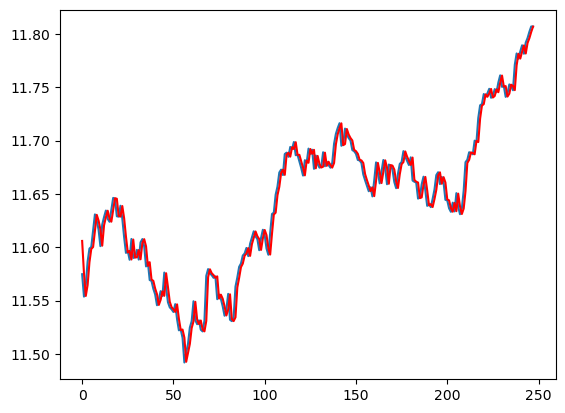

In [191]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest)
pyplot.plot(PredTest, color='red')
pyplot.show()


In [192]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_ROLL_model_fit.summary())

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Tue, 26 Mar 2024   AIC                         -31162.874
# Time:                        14:25:00   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5942
Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
Date:                Mon, 06 May 2024   AIC                         -31162.874
Time:                        15:16:19   BIC                         -31149.495
Sample:                             0   HQIC                        -31158.226
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

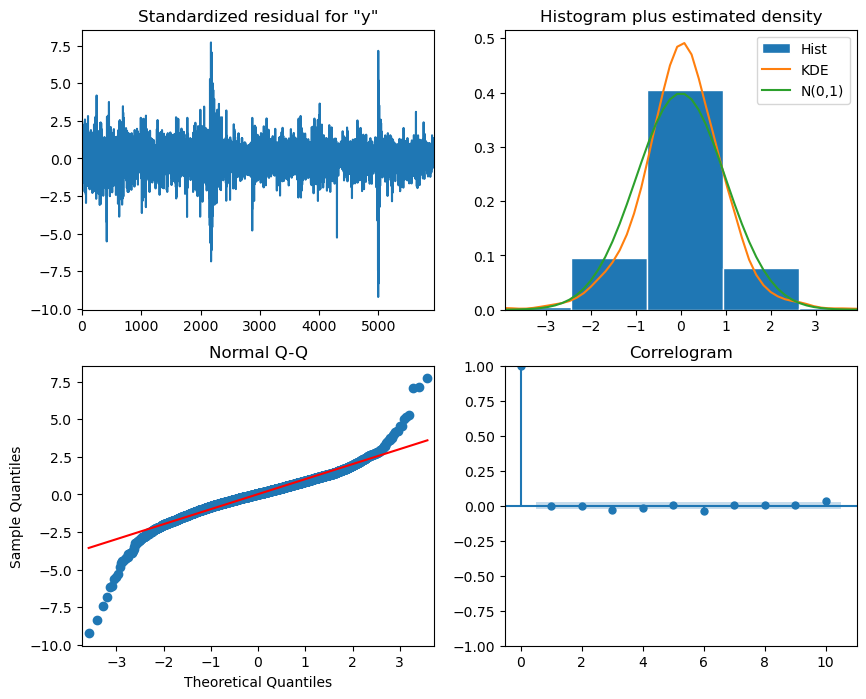

In [193]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: Only one significant Coefficients after lag 0, at lag 9 => close to White Noise.
#
# ***** ~ WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [194]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = SARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.67458    0.999993 (21)
#  11   0.723067   0.99999   (5)
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED.
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

lb_stat  lb_pvalue
11  0.67458   0.999993

In [195]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESULTS
#===============================================================================================================================
#dfln.rename(columns={"pred_SARIMAS_ROLLLn": "pred_SARIMARLn"}, inplace=True)
dfln[testini-1:]


Date      Close    CloseLn  CloseLnDiff  pred_LastLn  pred_MeanLn  \
5694 2022-12-29  109734.60  11.605820    -0.004565     0.000000     0.000000   
5695 2023-01-02  106376.02  11.574735    -0.031085    11.605820    10.729549   
5696 2023-01-03  104165.74  11.553739    -0.020997    11.574735    10.729697   
5697 2023-01-04  105334.46  11.564896     0.011157    11.553739    10.729842   
5698 2023-01-05  107641.32  11.586560     0.021664    11.564896    10.729988   
...         ...        ...        ...          ...          ...          ...   
5938 2023-12-21  132182.01  11.791935     0.010479    11.781457    10.766810   
5939 2023-12-22  132752.93  11.796245     0.004310    11.791935    10.766983   
5940 2023-12-26  133532.92  11.802103     0.005858    11.796245    10.767156   
5941 2023-12-27  134193.72  11.807040     0.004936    11.802103    10.767330   
5942 2023-12-28  134185.24  11.806977    -0.000063    11.807040    10.767505   

      pred_MALn  pred_ARLn  pred_ARMALn  pred_ARIMALn  pred_SARIMALn  \
5694   0.000000   0.000000     0.000000           NaN            NaN   
5695  11.606036  11.605954    11.606129     11.606108      11.606108   
5696  11.574359  11.575645    11.574421     11.604894      11.604894   
5697  11.554679  11.554345    11.554698     11.605185      11.605185   
5698  11.565731  11.564572    11.565738     11.605359      11.605359   
...         ...        ...          ...           ...            ...   
5938  11.780566  11.781677    11.780623     11.605002      11.605002   
5939  11.790923  11.791645    11.790986     11.605002      11.605002   
5940  11.796432  11.796126    11.796466     11.605002      11.605002   
5941  11.801401  11.801941    11.801490     11.605002      11.605002   
5942  11.806290  11.806903    11.806354     11.605002      11.605002   

      pred_SARIMASLn  pred_ARIMARLn  pred_SARIMARLn  
5694             NaN            NaN             NaN  
5695       11.605665      11.605938       11.605938  
5696       11.604714      11.575623       11.575623  
5697       11.606888      11.554352       11.554352  
5698       11.608003      11.564599       11.564599  
...              ...            ...             ...  
5938       11.687828      11.781667       11.781667  
5939       11.687099      11.791658       11.791658  
5940       11.688017      11.796122       11.796122  
5941       11.686567      11.801942       11.801942  
5942       11.686758      11.806903       11.806903  

[249 rows x 14 columns]

In [196]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
#mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
#mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])
#mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'])
mse_SARIMAR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMARLn'])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last       ,6)), "{:,}".format(round(sqrt(mse_Last)       ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean       ,6)), "{:,}".format(round(sqrt(mse_Mean)       ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA         ,6)), "{:,}".format(round(sqrt(mse_MA)         ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR         ,6)), "{:,}".format(round(sqrt(mse_AR)         ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA       ,6)), "{:,}".format(round(sqrt(mse_ARMA)       ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA      ,6)), "{:,}".format(round(sqrt(mse_ARIMA)      ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA     ,6)), "{:,}".format(round(sqrt(mse_SARIMA)     ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS    ,6)), "{:,}".format(round(sqrt(mse_SARIMAS)    ,6))] ,
                ['ARIMAR'     , "{:,}".format(round(mse_ARIMAR     ,6)), "{:,}".format(round(sqrt(mse_ARIMAR)     ,6))] ,
                ['SARIMAR'    , "{:,}".format(round(mse_SARIMAR    ,6)), "{:,}".format(round(sqrt(mse_SARIMAR)    ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#---------------------------------
#    Log           MSE      RMSE
#---------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.006206  0.078778
# 7  SARIMAS  0.002782  0.052747
# 8  ARIMAR   0.000118  0.010858
# 9  SARIMAR  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

Log       MSE      RMSE
0     Last  0.000117  0.010831
1     Mean  0.805004   0.89722
2       MA  0.000118  0.010843
3       AR  0.000118  0.010859
4     ARMA  0.000118  0.010841
5    ARIMA  0.006206  0.078778
6   SARIMA  0.006206  0.078778
7  SARIMAS  0.002782  0.052747
8   ARIMAR  0.000118  0.010858
9  SARIMAR  0.000118  0.010858

C:\Users\55119\AppData\Local\Temp\ipykernel_17352\2039437400.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(testini, totallen-testlen)


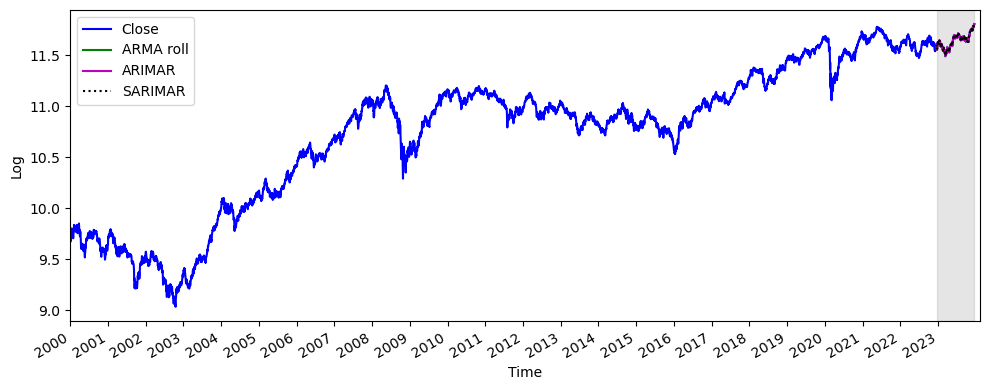

In [197]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']                       , 'b-', label='Close')    
#ax.plot(dfln.loc[testini:,'pred_LastLn']       , 'r:', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']        , 'g-', label='ARMA roll')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'm-', label='ARIMAR')   
ax.plot(dfln.loc[testini:,'pred_SARIMARLn'], 'k:', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen-testlen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

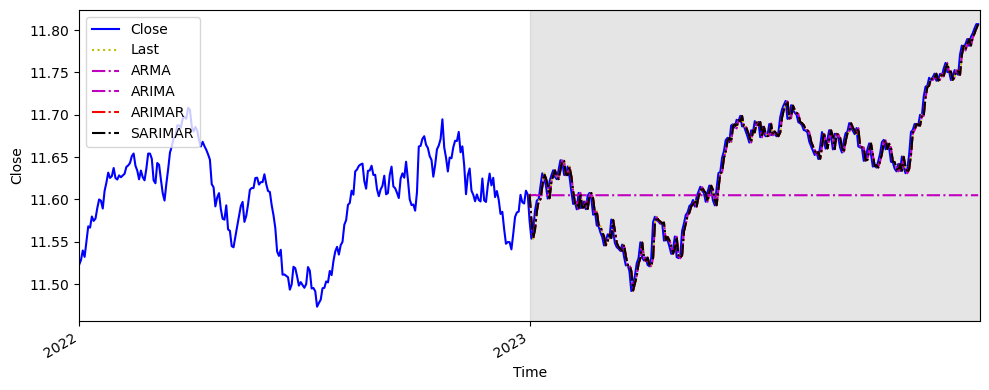

In [198]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen: ,'CloseLn']        , 'b-',  label='Close')    
ax.plot(dfln.loc[testini:         ,'pred_LastLn']    , 'y:',  label='Last')    
ax.plot(dfln.loc[testini:         ,'pred_ARMALn']    , 'm-.', label='ARMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMARLn']  , 'r-.', label='ARIMAR')   
ax.plot(dfln.loc[testini:         ,'pred_SARIMARLn'] , 'k-.', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen) 
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [199]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - RECOVER
#===============================================================================================================================
df['pred_SARIMAR'] = 0.0
df.loc[testini:,'pred_SARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_SARIMARLn']),2)

df[testini-1:]

Date      Close  pred_Last  pred_Mean    pred_MA    pred_AR  \
5694 2022-12-29  109734.60       0.00       0.00       0.00       0.00   
5695 2023-01-02  106376.02  109734.60   55564.15  109758.31  109749.29   
5696 2023-01-03  104165.74  106376.02   55573.07  106335.97  106472.78   
5697 2023-01-04  105334.46  104165.74   55581.60  104263.75  104228.91   
5698 2023-01-05  107641.32  105334.46   55590.33  105422.51  105300.39   
...         ...        ...        ...        ...        ...        ...   
5938 2023-12-21  132182.01  130804.17   57947.47  130687.70  130833.02   
5939 2023-12-22  132752.93  132182.01   57959.97  132048.23  132143.63   
5940 2023-12-26  133532.92  132752.93   57972.56  132777.81  132737.09   
5941 2023-12-27  134193.72  133532.92   57985.28  133439.21  133511.27   
5942 2023-12-28  134185.24  134193.72   57998.10  134093.12  134175.40   

      pred_ARMA  pred_ARIMAR  pred_SARIMAR  
5694       0.00         0.00          0.00  
5695  109768.49    109747.53     109747.53  
5696  106342.62    106470.44     106470.44  
5697  104265.68    104229.67     104229.67  
5698  105423.17    105303.17     105303.17  
...         ...          ...           ...  
5938  130695.24    130831.65     130831.65  
5939  132056.66    132145.45     132145.45  
5940  132782.23    132736.54     132736.54  
5941  133451.11    133511.44     133511.44  
5942  134101.76    134175.33     134175.33  

[249 rows x 9 columns]

In [201]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])
mse_SARIMAR= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))   , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))   , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))   , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))   , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))   , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMA'     , "{:,}".format(round(mse_ARIMA,))  , "{:,}".format(round(sqrt(mse_ARIMA)  ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)) , "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ,
                ['SARIMAR'   , "{:,}".format(round(mse_SARIMAR,)), "{:,}".format(round(sqrt(mse_SARIMAR),))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price              MSE   RMSE
#---------------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,483,149  1,218
# 4  ARMA     1,481,847  1,217
# 5  ARIMA            0      0
# 6  ARIMAR   1,482,795  1,218
# 7  SARIMAR  1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

Price            MSE    RMSE
0     Last      1,476,001   1,215
1     Mean  3,357,125,693  57,941
2       MA      1,482,532   1,218
3       AR      1,483,149   1,218
4     ARMA      1,481,847   1,217
5    ARIMA              0       0
6   ARIMAR      1,482,795   1,218
7  SARIMAR      1,482,795   1,218

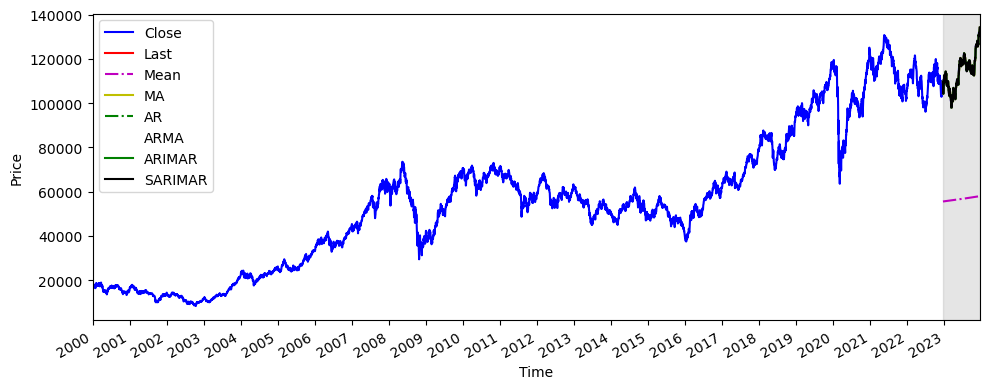

In [202]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last'    )
ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean'    )
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA'      )   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR'      )   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA'    )   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR'  )   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR' )   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

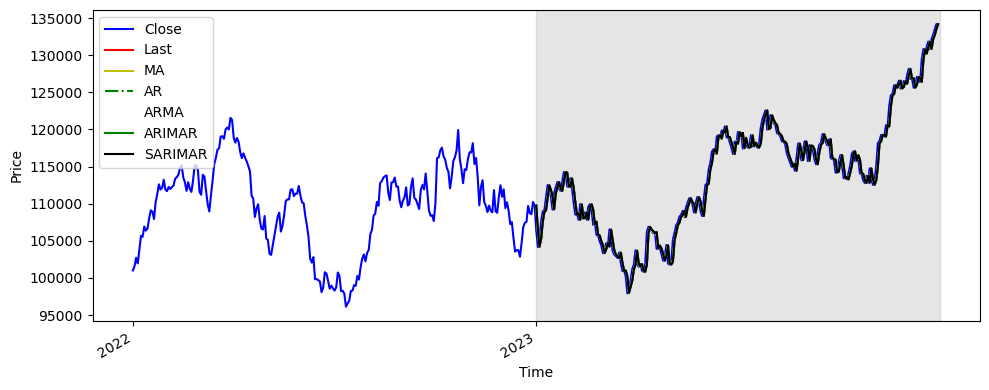

In [203]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA')   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA')   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR')   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()

